### Proyecto N°2: Análisis de mercado inmobiliario ###
### Ingeniería de features, Modelos avanzados e Interpretación de modelos

Para comenzar con el análisis en este segundo proyecto, voy a leer el dataset original Properati, aplicando los filtros y el modelo generado con hiperparametros optimizados a mano, que genere el Proyecto N°1. Esto lo tomare como punto de partida y comparación para identificar las mejoras que producirán (o no) todo el nuevo trabajo por realizar (Ingeniería de features y utilización de modelos avanzados).

Copio del Proyecto N°1 el dataset properati, aplico los filtros utilizados, realizo el entrenamiento y evaluación del modelo evaluado en esa oportunidad (Árbol de decisión).

Importo las librerías que utilizare en esta primera etapa.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import distplot

Cargo el dataset Properati

In [2]:
data=pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

Aplico los filtros que fueron solicitados en las consignas del proyecto N°1
Luego de la aplicación de todos los filtros quedaran los datos Departamentos en Capital Federal con superficie entre 15m2 y 1000 m2 y precio menor a USD 4.000.000 y sin valores faltantes.

In [3]:
data=data[(data.l2=='Capital Federal')]
data=data[((data.surface_total>15)&(data.surface_total<1000))]
data=data[(data.price<4000000)]
data=data[(data.property_type=='Departamento')]
fields=['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']
data=data[fields]
data.dropna(inplace=True)

In [4]:
print('Cantidad de filas y columnas:', data.shape)

Cantidad de filas y columnas: (69291, 6)


Ahora copio el modelo de árbol de decisión que utilice en el Proyecto N°1 y lo entreno y testeo para verificar que todos los valores coinciden con los generados en ese trabajo (Ver Proyecto N°1). Luego este mismo modelo lo volveré a utilizar una vez que aplique ingeniería de features tal cual lo solicita el enunciado para la parte A de este Proyecto N°2.

Importo las librerías para separación de datos, modelo de regresión DecisionTreeRegressor y metrica de evaluación RMSE.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import warnings

Separo los features X e y

In [6]:
fields_X=['surface_total','bathrooms','rooms', 'bedrooms']
X=data[fields_X]
fields_y=['price']
y=data[fields_y]

Genero el modelo con el número de vecinos optimizado a mano max_depth=7

In [7]:
arbol_tasador_propiedades = DecisionTreeRegressor(max_depth=7, random_state=42)

Realizo un train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(48503, 4) (20788, 4) (48503, 1) (20788, 1)


Entreno el modelo 

In [9]:
arbol_tasador_propiedades.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

A continuación, realizo la predicción sobre set de Train y el de Test. Luego evalúo la metrica RMSE para cada uno de estos sets de datos. Grafico el comportamiento del RMSE en ambos y grafico la relación "y (test) vs y_pred (test)".

Modelo: Arbol de decision Regresion
Raíz del error cuadrático medio en Train: 146235.44210555594
Raíz del error cuadrático medio en Test: 146574.4824095149


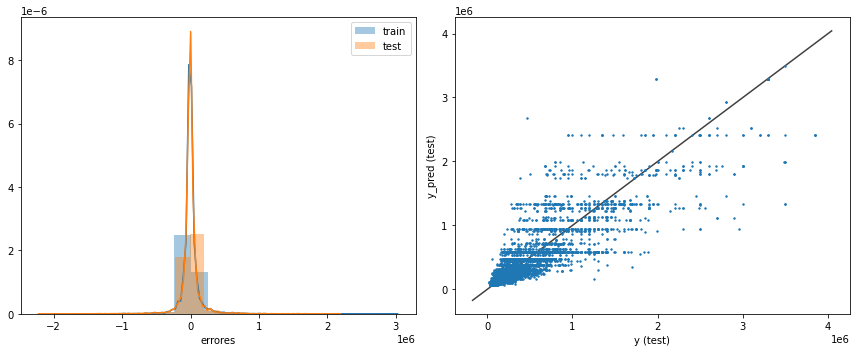

In [10]:
y_train_pred = arbol_tasador_propiedades.predict(X_train)
y_test_pred = arbol_tasador_propiedades.predict(X_test)
print('Modelo: Arbol de decision Regresion')
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
warnings.filterwarnings('ignore')
#Grafica de 
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred.reshape(len(y_train_pred),1), bins = 20, label = 'train')
sns.distplot(y_test- y_test_pred.reshape(len(y_test_pred),1), bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()   
ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
            ]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.tight_layout()
plt.show()

Lo realizado hasta el momento fue traer el modelo que solicita el enunciado, Árbol de decisión regresión con hiperparametro max_depth optimizado y tal cual fue generado en el Proyecto N°1. Este modelo será utilizado como punto de partida y comparación con lo que desarrollare a continuación.

### PARTE A - Transformación de Datos
### Consigna
Elige cuáles de las siguientes tareas son apropiadas para su dataset. Justifica e implementa:
* Detección y eliminación de Outliers
* Encoding
* Imputación de valores faltantes
* Escalado de datos
* Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe.

### Resolución
Cargo todas las librerías que usare para el tratamiento de datos

In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

Vuelvo a cargar el dataset Properati para realizarle la ingenieria de features

In [12]:
data=pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

Seguido imprimo las primeras 3 instancias del dataset y veo los tipos de datos de cada feature.

In [13]:
data.head(3)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta


Observo que los features (start_date, end_date, created_on, l1, currency, title y description) no son relevantes porque tienen información como texto libre, otras solo tienen un único valor y otras, información de fechas.

Detallo cada uno.
* start_date --> (Fecha de creación del registro)
* end_date   --> (Fecha de fin del registro)
* l1         --> (pais y son todos de Argentina)
* currency   --> (todos los datos están expresados en USD)
* title      --> (Texto libre que no aporta información para entrenar y predecir con un modelo)
* description--> (Texto libre que no aporta información para entrenar y predecir con un modelo)

Por lo detallado elimino todos estos features del dataset para quedarme con aquella información que pueda ayudarme a estimar los precios de las propiedades.

In [14]:
data.drop(['start_date', 'end_date', 'created_on', 'l1', 'currency', 'title', 
           'description', 'operation_type'], axis=1, inplace=True)

In [15]:
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


Imprimo la cantidad de valores faltantes por cada feature

In [16]:
data.isna().sum()

lat                 9925
lon                 9959
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
property_type          0
dtype: int64

Encuentro que el feature lat 9925 instancias con datos faltantes, lon con 9959, bathrooms tiene 5957, surface_total 20527 y surface_covered 21614. Voy a aplicar ingenieria de features a fin de primero filtrar outliers y luego imputar datos faltantes.
Decido esto ya que al observar la información de data.describe() observo que sobre estas instancias hay valores muy extremos (Outliers) que podrían generar desviaciones estadísticas para poder imputar aquellos valores faltantes.

Como un ejemplo de lo que digo expongo el caso del feature "surface_total":
* surface_total --> mean=216.87 m^2 (Valor medio)
* surface_total --> max=193.549.00 m^2 (Valor maximo)

Este caso me hace pensar que tal vez, al imputar valores faltantes sobre este feature, pueda estar cometiendo error a la hora de calcular el valor para imputar ya que la presencia de estos valores extremos atípicos puede afectar el valor calculado.

Debido a lo expuesto decido realizar primero un análisis de detección y eliminación de valores atípicos (Outliers) para todos los features con contenido numérico. Luego de este paso analizare si aun existen valores faltantes.

### Detección y eliminación de Outliers
A continuación, y previo a la imputación de valores faltantes voy a analizar valores outliers. Para esto comienzo viendo la información estadística de cada distribución. Ejecuto nuevamente .describe() para tener a mano la información estadística de cada feature.

In [17]:
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


Analizo que features voy a trabajar por valores outliers. 
* La variable Rooms tiene una media de 3,07 Ambientes y un valor máx. de 35 Ambientes (No parece logico).
* La variable Bedrooms tiene una media de 1,98 Dormitorios y un valor máx. de 15 Dormitorios (No parece logico).
* La variable Bathrooms tiene una media de 1,59 Baños y un valor máx. de 14 Baños (Tampoco parece logico).
* La variable Surface_total tiene una media de 216,8 m^2 y un valor máx. de 193.549 m^2 (No parece logico).
* La variable surface_covered tiene una media de 112,04 m^2 y un valor máx. de 126.062 m^2 (No parece lógico).
* La variable price tiene una media de USD 241.221,1 y un valor máx. de USD 3.243.423,0 (Podría tener valores outliers aunque el precio tan alto de propiedades no parece ser algo demasiado ilógico en el mercado de propiedades).

Grafico los boxplot de cada feature para ver la distribución de las variables e identificar gráficamente valores outliers.

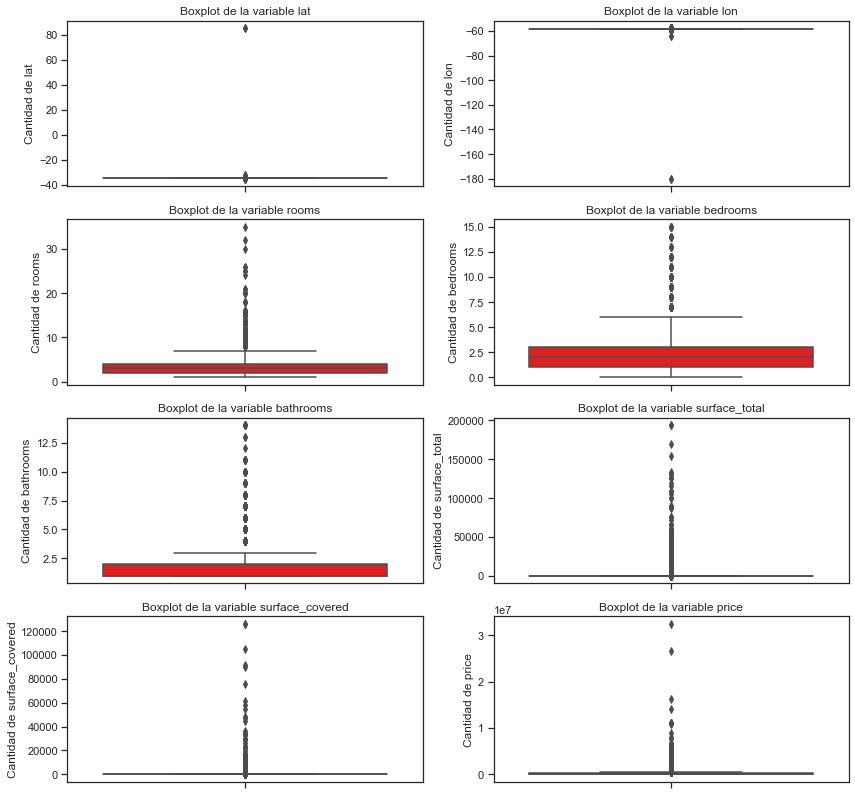

In [18]:
sns.set(style="ticks")
plt.figure(figsize = (14,14))
for i, variable in enumerate(['lat', 'lon','rooms', 'bedrooms','bathrooms','surface_total','surface_covered', 'price']):
    plt.subplot(4,2,i+1)
    sns.boxplot(y=variable, data=data, color='red')
    variabley='Cantidad de '+variable
    variablet='Boxplot de la variable '+variable
    plt.ylabel(variabley)
    plt.title(variablet)
plt.show()

En estos Boxplot se pueden visualizar valores Outliers en cada uno de los features que deforman las gráficas. Esto es de lo que hablaba en párrafos anteriores sobre que estos valores atípicos distorsionan la muestra. 

Voy a trabajar con cada variable a fin de filtrar estos valores, utilizando la regla del "Rango Intercuartílico". Con un código de ciclo for voy a eliminar todos los valores outliers para cada feature.

In [19]:
modelos=['lat', 'lon','rooms', 'bedrooms','bathrooms','surface_total','surface_covered','price']
for i, model in enumerate(['lat', 'lon','rooms', 'bedrooms','bathrooms',
                           'surface_total','surface_covered', 'price']):
    q25,q75 = np.nanpercentile(data[model], [25,75])
    iqr = q75 - q25
    minimo = q25 - 1.5*iqr
    maximo = q75 + 1.5*iqr
    print('\033[1m'+f'Feature: {modelos[i]}'+'\033[0;0m')
    print('Cuartil 25:',q25,'Cuartil 75:',q75,'Valor IQR:',iqr,'Valor minimo:', minimo,
          'Valor maximo:', maximo)
    mascara_outliers = ((data[model] < minimo) | (data[model]> maximo))
    data=data[(np.logical_not(mascara_outliers))]

Feature: lat
Cuartil 25: -34.627666999999995 Cuartil 75: -34.5745996 Valor IQR: 0.05306739999999621 Valor minimo: -34.70726809999999 Valor maximo: -34.49499850000001
Feature: lon
Cuartil 25: -58.484315 Cuartil 75: -58.4137016 Valor IQR: 0.07061339999999916 Valor minimo: -58.5902351 Valor maximo: -58.307781500000004
Feature: rooms
Cuartil 25: 2.0 Cuartil 75: 4.0 Valor IQR: 2.0 Valor minimo: -1.0 Valor maximo: 7.0
Feature: bedrooms
Cuartil 25: 1.0 Cuartil 75: 3.0 Valor IQR: 2.0 Valor minimo: -2.0 Valor maximo: 6.0
Feature: bathrooms
Cuartil 25: 1.0 Cuartil 75: 2.0 Valor IQR: 1.0 Valor minimo: -0.5 Valor maximo: 3.5
Feature: surface_total
Cuartil 25: 50.0 Cuartil 75: 110.0 Valor IQR: 60.0 Valor minimo: -40.0 Valor maximo: 200.0
Feature: surface_covered
Cuartil 25: 43.0 Cuartil 75: 84.0 Valor IQR: 41.0 Valor minimo: -18.5 Valor maximo: 145.5
Feature: price
Cuartil 25: 110000.0 Cuartil 75: 232000.0 Valor IQR: 122000.0 Valor minimo: -73000.0 Valor maximo: 415000.0


#### 

Luego de realizado esta detección y filtrado vuelvo a graficar los boxplot para cada variable y analizo el nuevo comportamiento.


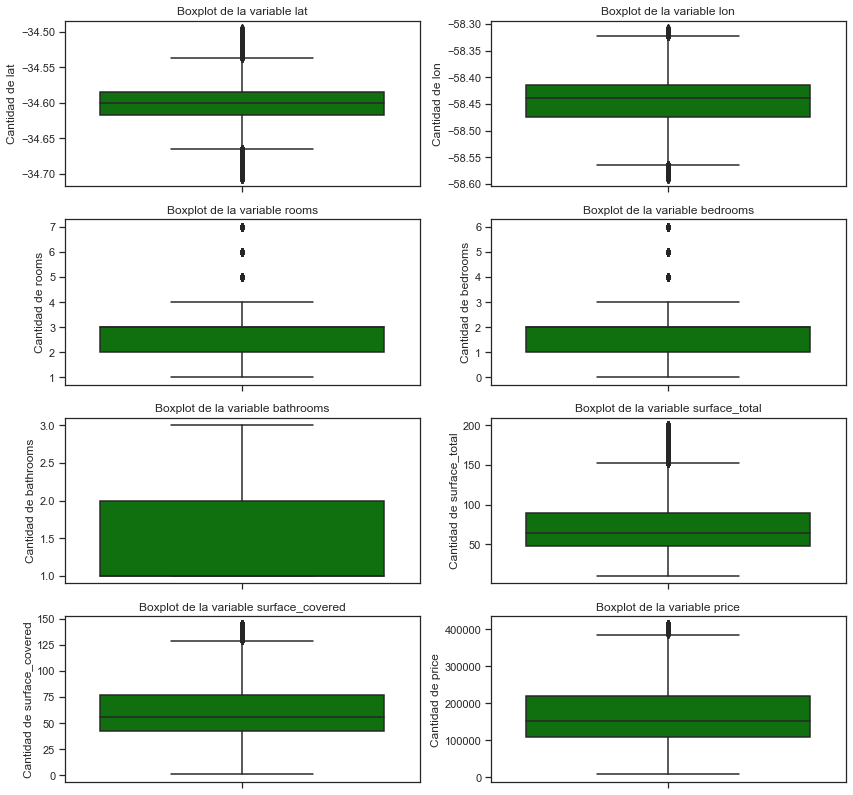

In [20]:
sns.set(style="ticks")
plt.figure(figsize = (14,14))

for i, variable in enumerate(['lat', 'lon','rooms', 'bedrooms','bathrooms','surface_total','surface_covered', 'price']):
    plt.subplot(4,2,i+1)
    sns.boxplot(y=variable, data=data, color='green')
    variabley='Cantidad de '+variable
    variablet='Boxplot de la variable '+variable
    plt.ylabel(variabley)
    plt.title(variablet)
plt.show()

Seguido grafico los histogramas de las variables analizadas a fin de ver la distribución de muestras.

### Distribuciones de los features sin valores outliers

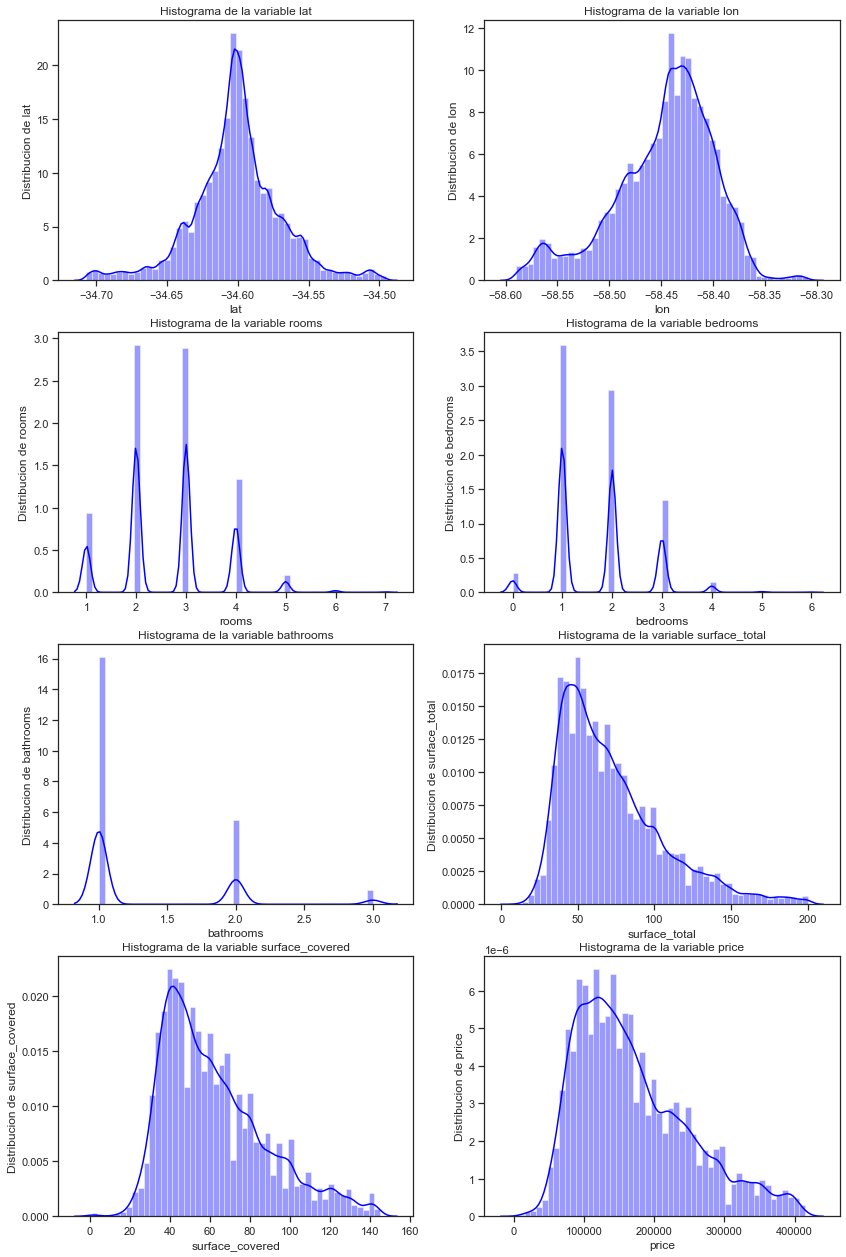

In [21]:
sns.set(style="ticks")
plt.figure(figsize = (14,22))
for i, variable in enumerate(['lat', 'lon','rooms', 'bedrooms','bathrooms','surface_total','surface_covered', 'price']):
    plt.subplot(4,2,i+1)
    sns.distplot(data[variable], color='blue',hist=True, rug=False, norm_hist=True)
    variabley='Distribucion de '+variable
    variablet='Histograma de la variable '+variable
    plt.ylabel(variabley)
    plt.title(variablet)
plt.show()

Veo que los histogramas son consistentes con las distribuciones esperadas para el tipo de cada variable.

### Análisis de valores faltantes e imputación 
A continuación, realizare el análisis para ver si tengo datos faltantes en el dataset. Si los hubiese realizare la imputación de ellos. Reviso para cada feature la cantidad de faltantes.

Buscare decidir el mecanismo que dio origen a los valores faltante de cada columna, para esto analizare lo siguiente: 
 * MCAR (el valor faltante es completamente al azar y no depende de otras variables)
 * MAR (la probabilidad de valor faltante depende de otra variable).
 * MNAR (la probabilidad de valor faltante depende de esa misma variable).

In [22]:
data.isna().sum()

lat                 7195
lon                 7226
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           3129
surface_total      11551
surface_covered    11932
price                  0
property_type          0
dtype: int64

Realizo una copia del dataset para trabajar en el analisis de cada feature con valores faltantes. Ellos son lat, lon, bathrooms, surface_total y surface_covered.

In [23]:
data_copy = data.copy()
data_copy.corr()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.092845,-0.036988,-0.038309,0.057761,-0.005389,-0.002174,0.287937
lon,-0.092845,1.000000,0.000154,0.011835,0.021722,-0.070139,0.021645,0.113992
rooms,-0.036988,0.000154,1.000000,0.933847,0.491457,0.715082,0.789754,0.551613
bedrooms,-0.038309,0.011835,0.933847,1.000000,0.488781,0.698308,0.779131,0.534908
bathrooms,0.057761,0.021722,0.491457,0.488781,1.000000,0.520070,0.577372,0.582451
surface_total,-0.005389,-0.070139,0.715082,0.698308,0.520070,1.000000,0.886140,0.637079
surface_covered,-0.002174,0.021645,0.789754,0.779131,0.577372,0.886140,1.000000,0.693246
price,0.287937,0.113992,0.551613,0.534908,0.582451,0.637079,0.693246,1.000000


Observo que la variable 'bathrooms', que tiene valores faltantes, correlaciona con 0,49 con la variable 'rooms'. Por este motivo analizare binarizando rooms, que no tiene valores faltantes, y vere la frecuencia de valores faltantes para la variable bathrooms por cada uno de los bins de rooms. 

In [24]:
data_copy['Ambientes-intervalos'] = pd.cut(data_copy.rooms, bins  = 6)
vf_VAVB = data_copy.bathrooms.isnull().groupby([data_copy['Ambientes-intervalos']]).sum().astype(int).reset_index(name='count')
vf_VAVB['freq'] = vf_VAVB['count']/data_copy.groupby([data_copy['Ambientes-intervalos']]).count()['bathrooms'].values
vf_VAVB['bin_centres'] = vf_VAVB['Ambientes-intervalos'].apply(lambda x: x.mid)
vf_VAVB

,Ambientes-intervalos,count,freq,bin_centres
0,"(0.994, 2.0]",1779,0.043649,1.497
1,"(2.0, 3.0]",861,0.027809,2.500
2,"(3.0, 4.0]",333,0.023031,3.500
3,"(4.0, 5.0]",100,0.045188,4.500
4,"(5.0, 6.0]",34,0.104615,5.500
5,"(6.0, 7.0]",22,0.289474,6.500


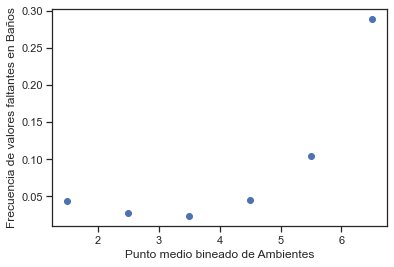

In [25]:
plt.scatter(vf_VAVB['bin_centres'], vf_VAVB['freq'])
plt.xlabel('Punto medio bineado de Ambientes')
plt.ylabel('Frecuencia de valores faltantes en Baños')
plt.show()

MAR (la probabilidad de valor faltante depende de otra variable): Observo que la variable baños tiene mayor frecuencia de valores faltantes a medida que aumenta la cantidad de ambientes de la propiedad. Esta puede ser una variable que podría usarse con Knn imputer para predecir el valor faltante de baños.

Ahora analizo las variables superficie total con respecto al precio que no tiene valores faltantes.

In [26]:
data_copy['Precios-intervalos'] = pd.cut(data_copy.price, bins = 10)
vf_VAVB = data_copy.surface_total.isnull().groupby([data_copy['Precios-intervalos']]).sum().astype(int).reset_index(name='count')
vf_VAVB['freq'] = vf_VAVB['count']/data_copy.groupby([data_copy['Precios-intervalos']]).count()['price'].values
vf_VAVB['bin_centres'] = vf_VAVB['Precios-intervalos'].apply(lambda x: x.mid)
vf_VAVB

,Precios-intervalos,count,freq,bin_centres
0,"(7092.5, 48250.0]",309,0.420981,27671.25
1,"(48250.0, 89000.0]",2309,0.185970,68625.00
2,"(89000.0, 129750.0]",2847,0.134002,109375.00
3,"(129750.0, 170500.0]",2277,0.112333,150125.00
4,"(170500.0, 211250.0]",1279,0.103395,190875.00
5,"(211250.0, 252000.0]",942,0.094059,231625.00
6,"(252000.0, 292750.0]",649,0.103525,272375.00
7,"(292750.0, 333500.0]",410,0.106273,313125.00
8,"(333500.0, 374250.0]",327,0.115834,353875.00
9,"(374250.0, 415000.0]",202,0.105263,394625.00


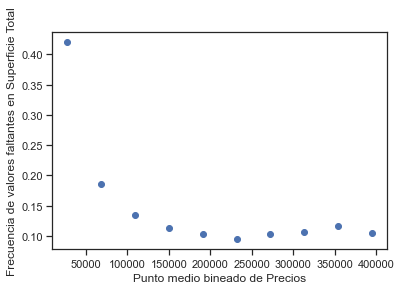

In [27]:
plt.scatter(vf_VAVB['bin_centres'], vf_VAVB['freq'])
plt.xlabel('Punto medio bineado de Precios')
plt.ylabel('Frecuencia de valores faltantes en Superficie Total')
plt.show()

MAR: Aqui identifico relacion entre el precio y la superficie total. Veo que a medida que el precio de la propiedad baja aumenta la freciencia de valores faltantes para el valor de superficie total. El precio podria servir para predecir los valores faltantes de superficie total. Por un tema de capacidad de computo de mi notebook, para estos valores faltantes voy a usar el imputador de ScikitLearn SimpleImputer para imputar con el valor mas frecuente de superficie total. Lo ideal seria KNNImputer pero es muy costoso computacionalmente y mi maquina no pudo lograrlo.

Ahora hago el mismo analisis para superficie cubierta. Espero encontrar similar resultado.

In [28]:
data_copy['Precios-intervalos'] = pd.cut(data_copy.price, bins = 10)
vf_VAVB = data_copy.surface_covered.isnull().groupby([data_copy['Precios-intervalos']]).sum().astype(int).reset_index(name='count')
vf_VAVB['freq'] = vf_VAVB['count']/data_copy.groupby([data_copy['Precios-intervalos']]).count()['price'].values
vf_VAVB['bin_centres'] = vf_VAVB['Precios-intervalos'].apply(lambda x: x.mid)
vf_VAVB

,Precios-intervalos,count,freq,bin_centres
0,"(7092.5, 48250.0]",319,0.434605,27671.25
1,"(48250.0, 89000.0]",2366,0.190561,68625.00
2,"(89000.0, 129750.0]",2949,0.138803,109375.00
3,"(129750.0, 170500.0]",2322,0.114554,150125.00
4,"(170500.0, 211250.0]",1352,0.109297,190875.00
5,"(211250.0, 252000.0]",980,0.097853,231625.00
6,"(252000.0, 292750.0]",675,0.107673,272375.00
7,"(292750.0, 333500.0]",419,0.108605,313125.00
8,"(333500.0, 374250.0]",340,0.120439,353875.00
9,"(374250.0, 415000.0]",210,0.109432,394625.00


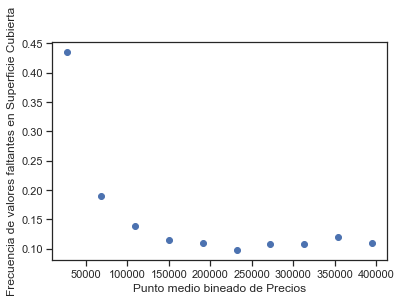

In [29]:
plt.scatter(vf_VAVB['bin_centres'], vf_VAVB['freq'])
plt.xlabel('Punto medio bineado de Precios')
plt.ylabel('Frecuencia de valores faltantes en Superficie Cubierta')
plt.show()

El resultado es similar al encontrado en Superficie total y las conclusiones para imputar identicas.

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91920 entries, 1 to 146653
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lat              84725 non-null  float64
 1   lon              84694 non-null  float64
 2   l2               91920 non-null  object 
 3   l3               91920 non-null  object 
 4   rooms            91920 non-null  float64
 5   bedrooms         91920 non-null  float64
 6   bathrooms        88791 non-null  float64
 7   surface_total    80369 non-null  float64
 8   surface_covered  79988 non-null  float64
 9   price            91920 non-null  float64
 10  property_type    91920 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.4+ MB


Realizo una parte de la imputación con KNNImputer (Baños referenciada a Ambientes).
La otra parte la realizare con SimpleImputer (Superficie Total, Superficie Cubierta, Latitud y Longitud con los valores más frecuentes)

In [31]:
imputer = KNNImputer(n_neighbors=3)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [32]:
data[['surface_total','surface_covered','lat','lon']]=imp_mean.fit_transform(data[['surface_total','surface_covered','lat','lon']])

In [33]:
data[['bathrooms']]=imputer.fit_transform(data[['bathrooms']],data[['rooms']])

In [34]:
data.isna().sum()

lat                0
lon                0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

Observo que ya no quedan valores faltantes

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91920 entries, 1 to 146653
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lat              91920 non-null  float64
 1   lon              91920 non-null  float64
 2   l2               91920 non-null  object 
 3   l3               91920 non-null  object 
 4   rooms            91920 non-null  float64
 5   bedrooms         91920 non-null  float64
 6   bathrooms        91920 non-null  float64
 7   surface_total    91920 non-null  float64
 8   surface_covered  91920 non-null  float64
 9   price            91920 non-null  float64
 10  property_type    91920 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.4+ MB


Tambien veo que conserve todo el set de datos con 91920 instancias

In [36]:
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91920.000000,91920.000000,91920.000000,91920.00000,91920.000000,91920.000000,91920.000000,91920.000000
mean,-34.600657,-58.446826,2.652611,1.70520,1.324312,68.977339,59.263577,170076.624772
std,0.030358,0.046344,0.995727,0.86365,0.539068,32.119207,25.111372,80793.105688
min,-34.707266,-58.590197,1.000000,0.00000,1.000000,10.000000,1.000000,7500.000000
25%,-34.615083,-58.470278,2.000000,1.00000,1.000000,49.000000,40.000000,109000.000000
50%,-34.598890,-58.443118,3.000000,2.00000,1.000000,58.000000,51.000000,151500.000000
75%,-34.587383,-58.415864,3.000000,2.00000,2.000000,84.000000,73.000000,220000.000000
max,-34.495292,-58.308119,7.000000,6.00000,3.000000,200.000000,145.000000,415000.000000


Una vez imputados todos los valores faltantes sigo limpiando el dataset.

### Filtrado de datos (superficie cubierta > superficie total) ####
A continuación filtro aquellos casos en que el valor de superficie cubierta es mayor que el de superficie total. Asumo que superficie total es el principal valor y no podría haber valores donde la superficie cubierta sea mayor a la superficie total.

In [37]:
data=data[data.surface_total>=data.surface_covered]

Observo cuantas instancias me quedan luego del filtro

In [38]:
print('El tamano del dataset es:',data.shape)

El tamano del dataset es: (91068, 11)


### Escalado de datos
Ahora realizo el escalado de datos para las variables numéricas. 
No realizo escalado sobre la variable Precio ya que esta será usada como etiqueta (y) cuando realice el entrenamiento y validación de modelos de ML.

Para realizar este trabajo utilizo de la librería sklearn.preprocessing el escalador StandardScaler.
Este eliminara la media y escalara a la varianza unidad.

In [39]:
scaler=preprocessing.StandardScaler(with_mean = False)
scaler.fit(data[['rooms', 'bedrooms','bathrooms','surface_total','surface_covered']])
datos_escalados=scaler.transform(data[['rooms', 'bedrooms','bathrooms','surface_total','surface_covered']])
data[['rooms', 'bedrooms','bathrooms','surface_total','surface_covered']]= datos_escalados

Para trabajar con las 3 propiedades mas abundantes aplico un filtro para quedarme con Tipo de propiedades, por Departamento, PH y Casa

In [40]:
data=data[((data.property_type=='Departamento')|(data.property_type=='PH')|(data.property_type=='Casa'))]

### Encoding

Para realizar este trabajo utilizo el método de la librería de Pandas "get_dummies". Este convertirá las variables categóricas en variables ficticias que sean indicadoras del valor. 0 si no es y 1 si es.

In [41]:
data[['casa','departamento','ph']]=pd.get_dummies(data['property_type'])
data.drop('property_type', axis=1, inplace=True)

In [42]:
data[['zona_norte','zona_oeste','zona_sur','capital_federal']]=pd.get_dummies(data[['l2']])
data.drop('l2', axis=1, inplace=True)

In [43]:
data.head(3)

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,casa,departamento,ph,zona_norte,zona_oeste,zona_sur,capital_federal
1,-34.624056,-58.412110,Boedo,2.010026,1.158029,3.703034,2.177606,2.313941,159000.0,0,0,1,0,0,0,1
2,-34.593569,-58.427474,Palermo,2.010026,1.158029,1.851517,1.399890,1.795299,125000.0,0,0,1,0,0,0,1
3,-34.581294,-58.436754,Palermo,2.010026,1.158029,1.851517,2.644236,1.994776,295000.0,0,0,1,0,0,0,1


### Matriz de correlación

Ahora para continuar con el análisis del dataset imprimo las correlaciones de cada variable para comenzar a observar cuales serán mejores predictoras del precio.

In [44]:
data.corr()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,casa,departamento,ph,zona_norte,zona_oeste,zona_sur,capital_federal
lat,1.000000,-0.092834,-0.032731,-0.034384,0.056213,0.021077,0.031037,0.279637,-0.064563,0.084441,-0.058815,0.367340,-0.267268,-0.327437,0.057618
lon,-0.092834,1.000000,0.000136,0.010552,0.020972,-0.028050,0.060207,0.115240,-0.164319,0.211672,-0.146113,-0.228690,-0.544502,0.206723,0.436098
rooms,-0.032731,0.000136,1.000000,0.933646,0.482255,0.653984,0.708971,0.557070,0.194965,-0.267915,0.191881,0.028841,0.004833,0.024763,-0.033946
bedrooms,-0.034384,0.010552,0.933646,1.000000,0.478778,0.629437,0.690428,0.541221,0.183738,-0.252507,0.180853,0.017776,-0.005153,-0.003113,-0.007761
bathrooms,0.056213,0.020972,0.482255,0.478778,1.000000,0.456196,0.494325,0.575369,0.084560,-0.045388,0.005011,0.071475,-0.050089,-0.015073,-0.010576
surface_total,0.021077,-0.028050,0.653984,0.629437,0.456196,1.000000,0.886577,0.596413,0.156726,-0.337946,0.289633,0.129924,-0.029588,0.021273,-0.080661
surface_covered,0.031037,0.060207,0.708971,0.690428,0.494325,0.886577,1.000000,0.640999,0.089417,-0.244711,0.222570,0.080281,-0.070118,0.008771,-0.013494
price,0.279637,0.115240,0.557070,0.541221,0.575369,0.596413,0.640999,1.000000,0.055092,-0.017446,-0.010126,0.055417,-0.185831,-0.109610,0.130942
casa,-0.064563,-0.164319,0.194965,0.183738,0.084560,0.156726,0.089417,0.055092,1.000000,-0.428118,-0.060723,0.089131,0.191721,0.121358,-0.241486
departamento,0.084441,0.211672,-0.267915,-0.252507,-0.045388,-0.337946,-0.244711,-0.017446,-0.428118,1.000000,-0.876059,-0.080403,-0.135109,-0.083828,0.181838


Grafico la matriz de correlación. Contiene la misma información, pero en forma gráfica y más representativa visualmente.

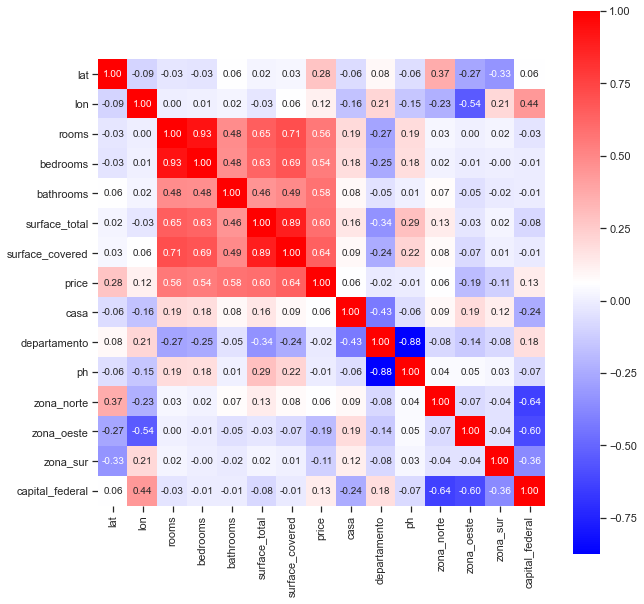

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(data.drop(columns = 'l3').corr(), cbar = True, square = True, annot=True, fmt= '.2f',
            annot_kws={'size': 10}, xticklabels= data.drop(columns = 'l3').columns,  yticklabels=data.drop(columns = 'l3').columns, cmap= 'bwr')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

En la matriz grafica se puede observar que el Precio tiene altas correlaciones con variables como rooms, bedrooms, bathrooms, surface_total, surface_covered (se encuentran en la zona roja de la representación). Además se observa buena correlación con la variable lat y en menor medida con lon.

### Separo dataset en X e y

In [46]:
X=data.drop(['l3','price'],axis=1 )
fields_y=['price']
y=data[fields_y]

### Reducción de dimensionalidad con PCA

A continuación, realizo una reducción de dimensionalidad a fin de trabajar con un set de datos más acotado en dimensión el cual conservara gran parte de la información contenida en el dataset original con el cual venía trabajando.

In [47]:
pca = PCA(n_components=2)
X_nuevo = pca.fit_transform(X) 
print('El tamano del dataset con reduccion de dimensionalidad es:',X_nuevo.shape)

El tamano del dataset con reduccion de dimensionalidad es: (90044, 2)


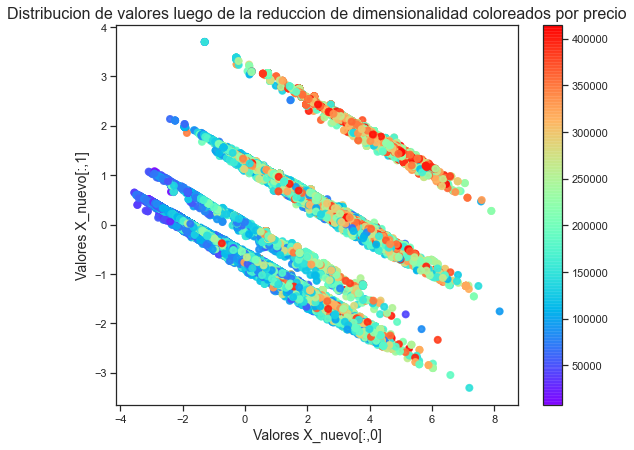

In [48]:
plt.figure(figsize=(9,7))
ax=plt.scatter(x=X_nuevo[:,0],y=X_nuevo[:,1], c = y.values, alpha=0.9,plotnonfinite=False, cmap= 'rainbow', linewidths=2)
plt.xlabel('Valores X_nuevo[:,0]',fontsize=14)
plt.ylabel('Valores X_nuevo[:,1]',fontsize=14)
plt.colorbar(ax)
plt.title('Distribucion de valores luego de la reduccion de dimensionalidad coloreados por precio',fontsize=16)
plt.show()

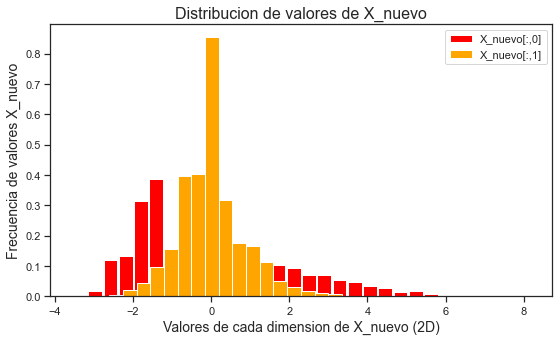

In [49]:
plt.figure(figsize=(9,5))
plt.hist(x=X_nuevo[:,0], label='X_nuevo[:,0]',density=True,rwidth=0.9,histtype='bar' ,bins=30, color='red')
plt.hist(x=X_nuevo[:,1], label='X_nuevo[:,1]',density=True, rwidth=1.4,histtype='bar' , bins=20, color='orange')
plt.xlabel('Valores de cada dimension de X_nuevo (2D)',fontsize=14)
plt.ylabel('Frecuencia de valores X_nuevo',fontsize=14)
plt.legend()
plt.title('Distribucion de valores de X_nuevo',fontsize=16)
plt.show()

En estas graficas analizo el set de datos luego de reducción de dimensionalidad aplicado. Ahora el dataset contiene 2 columnas y 90044 filas.

### Defino funciones para evaluar los modelos

En este apartado desarrollo las funciones que me servirán para evaluar los distintos modelos y para luego graficar las comparaciones entre ellos.

In [50]:
#Funcion para comparar las metricas RMSE del modelo arbol de decision regresion de la Parte A
def porcentaje_de_mejora(rmse_test_nuevo, rmse_test, modelo_proyecto):
    start = "\033[1m"
    end = "\033[0;0m"
    porcentaje_mejora=(100-(rmse_test_nuevo*100/rmse_test))
    if (modelo_proyecto==True):
        if (porcentaje_mejora>=0):
            print(start +'La metrica de error RMSE, en el set de test, mejoro un',"{0:.2f}"
                  .format(porcentaje_mejora),'% respecto del modelo del PROYECTO N°1'+end )
            print('\n')
        else:
                print(start +'La metrica de error RMSE, en el set de test, empeoro en un',"{0:.2f}"
                      .format(porcentaje_mejora),'% respecto del modelo del PROYECTO N°1'+end )
                print('\n')
    else:
            if (porcentaje_mejora>=0):
                print(start +'La metrica de error RMSE, en el set de test, mejoro un',"{0:.2f}"
                      .format(porcentaje_mejora),'% respecto del modelo de la PARTE A'+end )
                print('\n')
            else:
                    print(start +'La metrica de error RMSE, en el set de test, empeoro en un',"{0:.2f}"
                          .format(porcentaje_mejora),'% respecto del modelo de la PARTE A'+end )
                    print('\n')

In [51]:
#Funcion para comparar las metricas RMSE del modelo arbol de decision regresion de la Parte A
def evaluar_regresion(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ### CALCULAMOS EL ERROR
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred.reshape(-1,1), bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred.reshape(-1,1), bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2,color='royalblue' )
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.tight_layout()
    plt.show()
    return rmse_train, rmse_test, model

In [52]:
def evaluar_distintos_polinomios (model, degree, X_train, X_test, y_train, y_test, RMSE_PARTEA):
    for idx,potencia_maxima in enumerate(range(1,degree)):
        print(f'REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO {idx + 1}')
        print(f'Agregamos atributos hasta la potencia x**{potencia_maxima}')
        
        poly = PolynomialFeatures(degree=potencia_maxima, include_bias=False)
        poly.fit(X_train)
        X_train_orden_superior =poly.transform(X_train)
        X_test_orden_superior = poly.transform(X_test)
        print(f'Los atributos tienen forma: {X_train_orden_superior.shape}')
              ### ENTRENAMOS
        model.fit(X_train_orden_superior, y_train)
              ### COMPLETAR AQUI PARA RESOLVER CHALLENGE
        print(f'Pendientes: {model.coef_}')
        print(f'Ordenada: {model.intercept_}')
        RMSE_REGRESION_LINEAL=evaluar_regresion(model, X_train_orden_superior, X_test_orden_superior, y_train, y_test)
        porcentaje_de_mejora(RMSE_REGRESION_LINEAL[1], RMSE_PARTEA, False)
        lista_metricas_y_modelos.append(RMSE_REGRESION_LINEAL)

## Entrenamiento de modelo con el set de datos tratado con ingeniería de features

Cargo las librerías que utilizare durante este desarrollo.

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
import scipy as sp
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

### Entrenamiento y predicción con el mismo modelo traído del Proyecto N°1  (Benchmark)
#### (Se encuentra copiado en el principio de este trabajo). Árbol de Decisión Regresión.

In [54]:
lista_metricas_y_modelos=[]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y, test_size=0.3, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(63030, 2) (27014, 2) (63030, 1) (27014, 1)


In [56]:
arbol_tasador_propiedades = DecisionTreeRegressor(max_depth=7, random_state=42)

In [57]:
arbol_tasador_propiedades.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

Raíz del error cuadrático medio en Train: 53078.69069388071
Raíz del error cuadrático medio en Test: 53833.892395126495


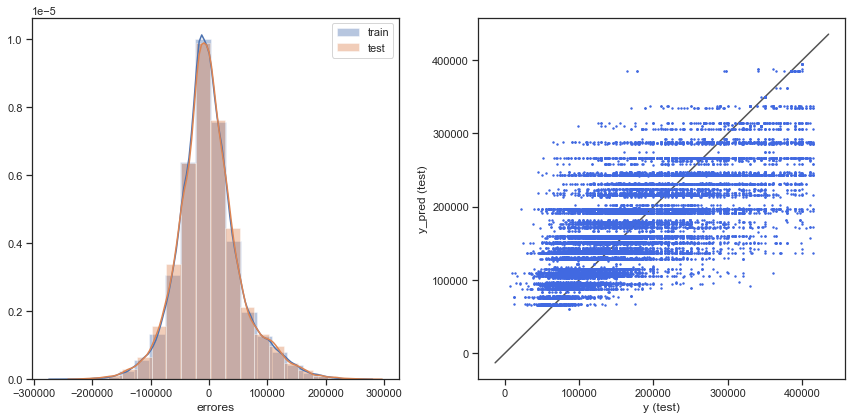

La metrica de error RMSE, en el set de test, mejoro un 63.27 % respecto del modelo del PROYECTO N°1




In [58]:
RMSE_PARTEA=evaluar_regresion(arbol_tasador_propiedades, X_train, X_test, y_train, y_test)
porcentaje_de_mejora(RMSE_PARTEA[1], rmse_test, True)
lista_metricas_y_modelos.append(RMSE_PARTEA)

Al realizar la comparación de la metrica RMSE del modelo inicial del Proyecto N°1 y este último modelo (entrenado con el set de datos con ingeniería de features aplicada) veo que se redujo el error en las predicciones considerablemente. El trabajar sobre los datos realizando la ingeniería previa, hizo que el mismo modelo Árbol de Decisión Regresión con idénticos hiperparamentros preformó en el orden del 60 % mejor.

### Conclusión:

Al realizar sobre el dataset original:
* Detección y eliminación de Outliers
* Imputacion de valores faltantes
* Encoding
* Escalado de datos
* Reducción de dimensionalidad (con PCA).

Logre mejorar la calidad de los datos con los que entrene el mismo modelo y de acuerdo con lo esperado, conseguí un modelo que tiene una mejor medición en la metrica RMSE (Raíz del error cuadrático medio) entre las predicciones que este logra y las etiquetas reales para el set de test.

## PARTE B - Modelos Avanzados

### Consigna
* Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

* Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

* Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

### Resolución 
Selecciono dos modelos avanzados para trabajar con ellos:
* Regresión lineal con regularización
* Random Forest 

Voy a comparar estos dos nuevos modelos avanzados, por medio de la metrica RMSE, para evaluar las mejoras o no que presentan estos con respecto al obtenido en la PARTE A.

### Regresión lineal con agregado de nuevos atributos de orden superior

Voy a entrenar regresion lineal con un dataset el cual le agregare variables (atributos) de orden superior hasta 12 y correre la simulacion a fin de ver como va variando la metrica de error RMSE de cada modelo con respecto a mi Benchmark (Arbol entrenado en la PARTE A)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y, test_size=0.3, random_state=42)

In [60]:
regresion_lineal_tasador_propiedades = LinearRegression()
degree=12
regresion_lineal_tasador_propiedades_cv = cross_validate(regresion_lineal_tasador_propiedades, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
regresion_lineal_tasador_propiedades_cv['test_score']

array([-3.18524219e+09, -3.23676537e+09, -3.23892589e+09, -3.32172074e+09,
       -3.33422448e+09])

REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 1
Agregamos atributos hasta la potencia x**1
Los atributos tienen forma: (63030, 2)
Pendientes: [[28937.94006539 18371.69740195]]
Ordenada: [170721.18760524]
Raíz del error cuadrático medio en Train: 57124.44697814872
Raíz del error cuadrático medio en Test: 57455.17799004388


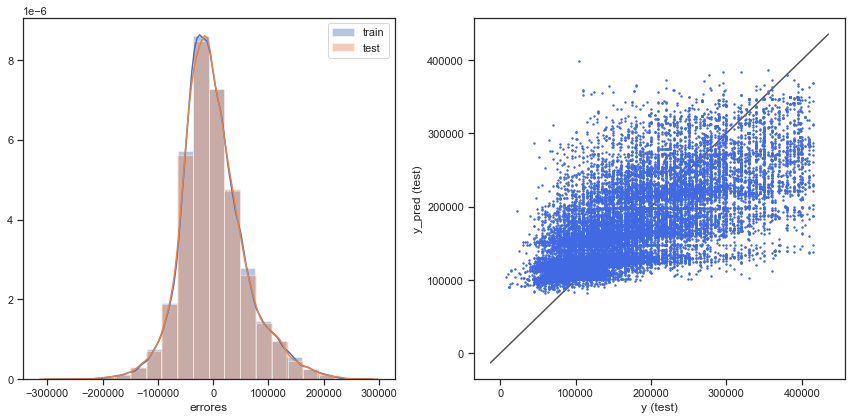

La metrica de error RMSE, en el set de test, empeoro en un -6.73 % respecto del modelo de la PARTE A


REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 2
Agregamos atributos hasta la potencia x**2
Los atributos tienen forma: (63030, 5)
Pendientes: [[32122.3879571  19572.22582226 -2113.51098977   257.06102466
   -744.15082166]]
Ordenada: [178756.23946866]
Raíz del error cuadrático medio en Train: 56463.594668562575
Raíz del error cuadrático medio en Test: 56740.83729271226


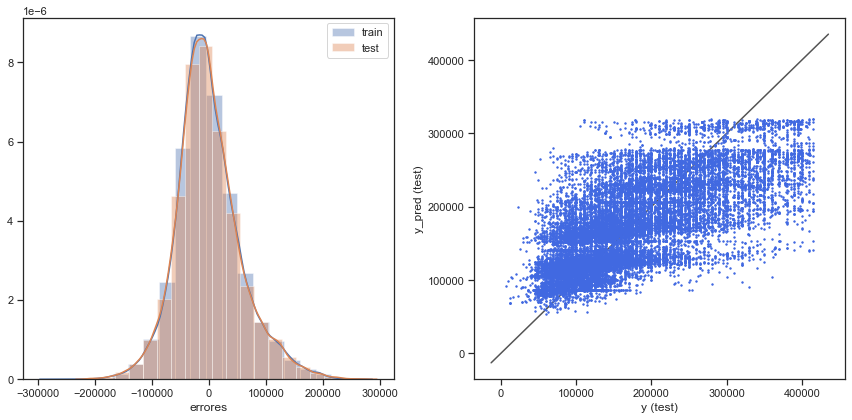

La metrica de error RMSE, en el set de test, empeoro en un -5.40 % respecto del modelo de la PARTE A


REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 3
Agregamos atributos hasta la potencia x**3
Los atributos tienen forma: (63030, 9)
Pendientes: [[33350.51510599 20807.98082613 -2871.20497121 -4862.02820081
  -8416.26356013    41.3165696    633.34917231  2025.6633794
   2344.21825174]]
Ordenada: [183374.20376385]
Raíz del error cuadrático medio en Train: 56441.98103265884
Raíz del error cuadrático medio en Test: 56731.60614720098


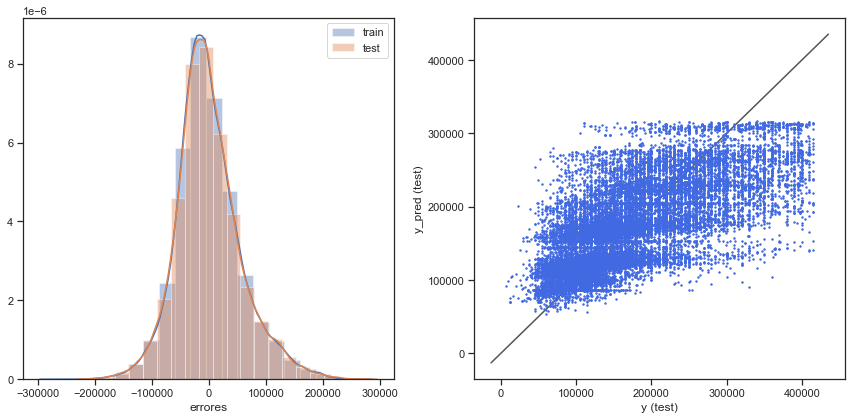

La metrica de error RMSE, en el set de test, empeoro en un -5.38 % respecto del modelo de la PARTE A


REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 4
Agregamos atributos hasta la potencia x**4
Los atributos tienen forma: (63030, 14)
Pendientes: [[ 25874.54081908 -13753.43564518  -2189.50808595  -7228.75157021
  -13435.27514941    898.92268043   9594.05844206  41693.24273314
   46529.42686048    -94.69449501   -970.64924316  -6873.10805344
  -14491.69949995 -11886.52102379]]
Ordenada: [175552.91506501]
Raíz del error cuadrático medio en Train: 56087.26580452133
Raíz del error cuadrático medio en Test: 56336.8901384866


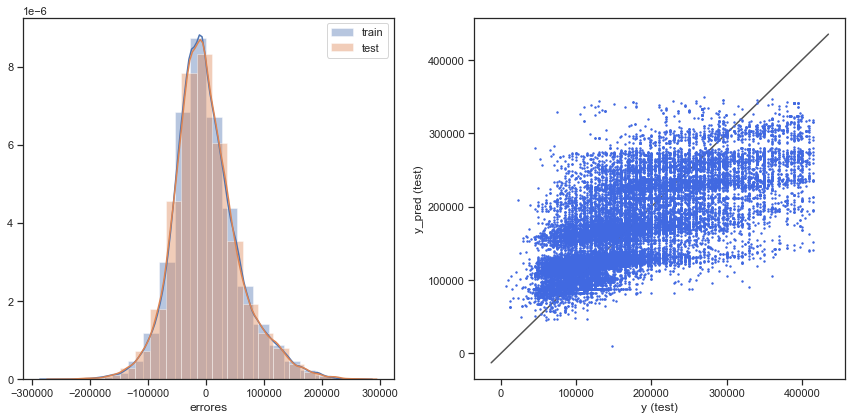

La metrica de error RMSE, en el set de test, empeoro en un -4.65 % respecto del modelo de la PARTE A


REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 5
Agregamos atributos hasta la potencia x**5
Los atributos tienen forma: (63030, 20)
Pendientes: [[ 1.38812220e+04 -3.03721103e+04 -2.17969860e+03  6.26018189e+03
   2.80869997e+04  2.48883094e+03  2.10261672e+04  7.00499941e+04
   6.90583688e+04 -1.14429484e+02 -3.47414134e+03 -2.66064568e+04
  -6.14086064e+04 -5.26990608e+04 -1.93747529e+01  5.58898756e+01
   1.70857325e+03  6.99904613e+03  1.34985460e+04  9.28261836e+03]]
Ordenada: [163080.94880462]
Raíz del error cuadrático medio en Train: 55826.73820081643
Raíz del error cuadrático medio en Test: 56038.84572709284


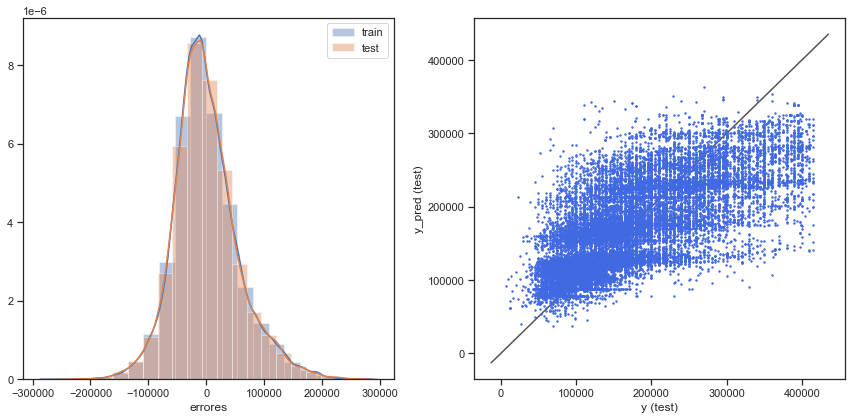

La metrica de error RMSE, en el set de test, empeoro en un -4.10 % respecto del modelo de la PARTE A


REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 6
Agregamos atributos hasta la potencia x**6
Los atributos tienen forma: (63030, 27)
Pendientes: [[ 1.58081575e+04 -1.44343884e+04 -1.50861326e+03  2.37888367e+04
   5.73580782e+04  2.06875306e+03  1.40240118e+04  5.08102634e+04
   4.39829940e+04 -8.21336606e+01 -4.96374409e+03 -3.66603969e+04
  -9.05038856e+04 -7.82723297e+04 -1.24963537e+01  6.16150866e+02
   4.71936434e+03  2.21704031e+04  4.31482011e+04  3.05962696e+04
  -1.00030848e+00 -4.09414263e+01 -1.58767430e+02 -1.29711801e+03
  -4.03209815e+03 -6.18681676e+03 -3.71065857e+03]]
Ordenada: [161687.38426005]
Raíz del error cuadrático medio en Train: 55757.075899222116
Raíz del error cuadrático medio en Test: 55949.67343943298


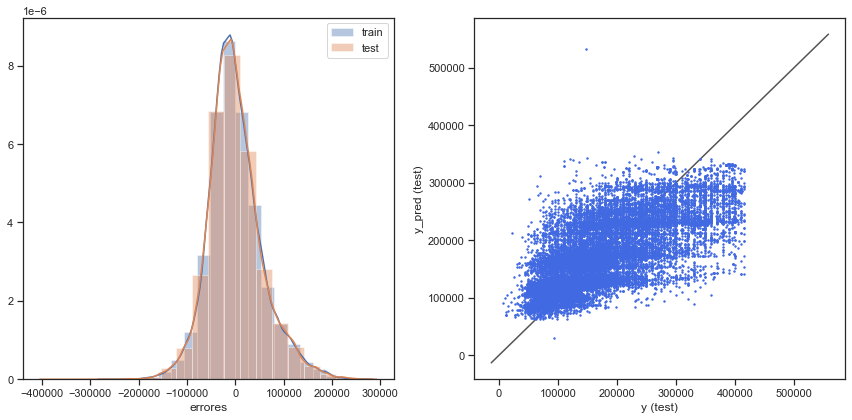

La metrica de error RMSE, en el set de test, empeoro en un -3.93 % respecto del modelo de la PARTE A


REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 7
Agregamos atributos hasta la potencia x**7
Los atributos tienen forma: (63030, 35)
Pendientes: [[ 2.94018181e+04  7.07084806e+03  6.85643134e+02  3.43803745e+04
   7.04888364e+04 -3.37746851e+03 -1.48652235e+04  3.31676131e+03
   1.43521778e+04  2.97629104e+01 -4.27430214e+03 -4.20153912e+04
  -9.90813714e+04 -8.47164597e+04  6.48027935e+02  6.53162013e+03
   2.38560912e+04  5.89109535e+04  8.24385452e+04  4.71276268e+04
  -1.40786229e+02 -1.52757312e+03 -5.51680348e+03 -1.47185814e+04
  -2.34455307e+04 -2.27163721e+04 -9.88530063e+03  8.04748327e+00
   1.00620763e+02  4.16831256e+02  1.25389970e+03  2.29687980e+03
   2.94274709e+03  2.03566128e+03  7.25845357e+02]]
Ordenada: [164499.5864615]
Raíz del error cuadrático medio en Train: 55661.89224103103
Raíz del error cuadrático medio en Test: 55882.88080548174


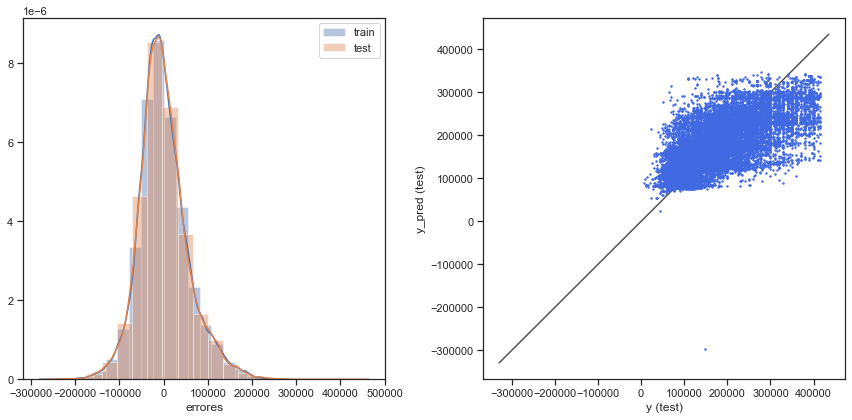

La metrica de error RMSE, en el set de test, empeoro en un -3.81 % respecto del modelo de la PARTE A


REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 8
Agregamos atributos hasta la potencia x**8
Los atributos tienen forma: (63030, 44)
Pendientes: [[ 1.04943172e+05  1.90835031e+05 -5.96386576e+03  3.93196580e+04
   1.33084498e+05 -3.53962007e+04 -2.49726028e+05 -6.13648749e+05
  -5.16819793e+05  7.30509658e+03  6.59249820e+04  1.82494153e+05
   1.52874313e+05 -1.03232744e+04  3.53889278e+03  4.21068904e+04
   2.13429482e+05  5.72372581e+05  7.82886382e+05  4.34714067e+05
  -1.35043165e+03 -2.03207476e+04 -1.22978130e+05 -3.93320113e+05
  -6.92692913e+05 -6.31412819e+05 -2.33272322e+05  1.51052542e+02
   2.86214354e+03  2.11162443e+04  8.32506676e+04  1.90548248e+05
   2.49447643e+05  1.67713009e+05  4.06091759e+04 -5.45670339e+00
  -1.30044387e+02 -1.15281221e+03 -5.50761491e+03 -1.58625404e+04
  -2.78398654e+04 -2.84432155e+04 -1.42924985e+04 -1.71826174e+03]]
Ordenada: [168657.61181522]
R

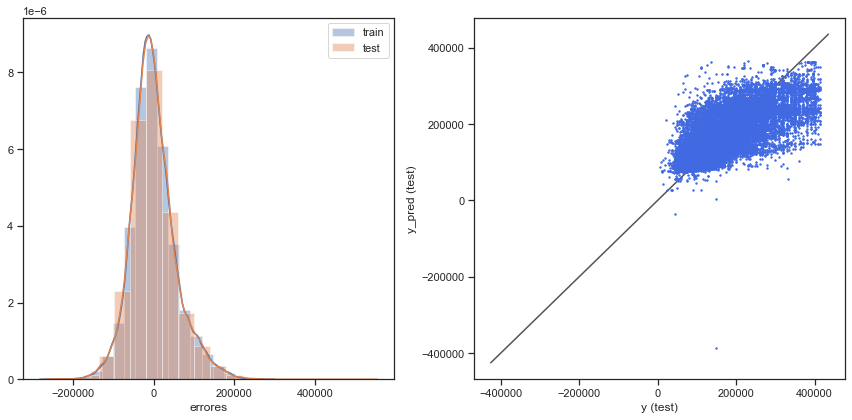

La metrica de error RMSE, en el set de test, empeoro en un -3.15 % respecto del modelo de la PARTE A


REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 9
Agregamos atributos hasta la potencia x**9
Los atributos tienen forma: (63030, 54)
Pendientes: [[ 8.27412235e+04  9.42656127e+04 -4.73181578e+04 -1.58303930e+05
  -6.86717974e+04 -3.24525957e+04 -1.91247023e+05 -4.31598840e+05
  -2.98313081e+05  2.06590638e+04  2.00110172e+05  6.54561172e+05
   8.57832499e+05  3.54948176e+05  1.64917186e+03  9.49278802e+03
   4.40921857e+04  1.50953224e+05  2.38692553e+05  1.19927482e+05
  -2.50961739e+03 -3.70596939e+04 -2.22395858e+05 -7.01855532e+05
  -1.21303618e+06 -1.07485217e+06 -3.72273116e+05  5.00787770e+02
   9.79857087e+03  7.29339726e+04  2.86878137e+05  6.65416838e+05
   9.20189344e+05  7.06674602e+05  2.35495114e+05 -3.87509941e+01
  -9.81889174e+02 -8.83496093e+03 -4.18574454e+04 -1.21491058e+05
  -2.26101377e+05 -2.69649865e+05 -1.92450871e+05 -6.40987354e+04
   1.03314640e+00  3.43129588e+

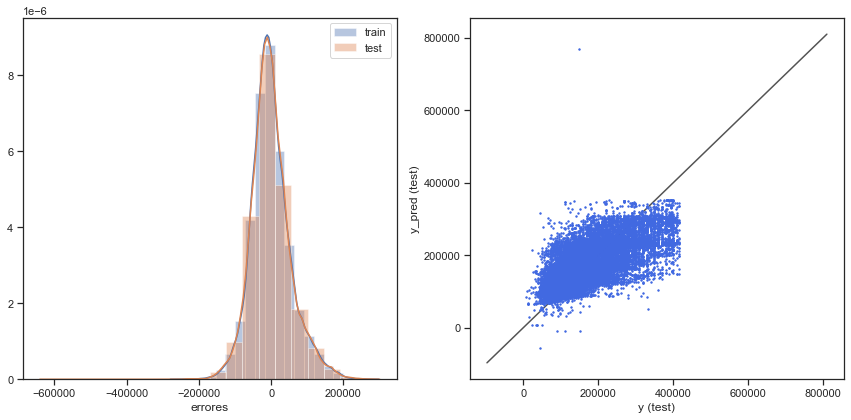

La metrica de error RMSE, en el set de test, empeoro en un -2.98 % respecto del modelo de la PARTE A


REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 10
Agregamos atributos hasta la potencia x**10
Los atributos tienen forma: (63030, 65)
Pendientes: [[ 1.67596573e+05  3.30222952e+05 -5.68626439e+03 -4.55285395e+04
  -4.37733168e+04 -7.95189773e+04 -5.88013867e+05 -1.61097729e+06
  -1.50333214e+06  1.01429630e+04  1.42636222e+05  5.17683954e+05
   8.21763767e+05  5.05941509e+05  1.26426084e+04  1.53436574e+05
   8.16804966e+05  2.28083702e+06  3.28732493e+06  1.92597445e+06
  -2.99544047e+03 -5.17748083e+04 -3.29570647e+05 -1.16788498e+06
  -2.36073865e+06 -2.56095761e+06 -1.17038797e+06 -3.50343749e+02
  -4.60869889e+03 -3.79651323e+04 -1.89890666e+05 -5.84102503e+05
  -1.08143334e+06 -1.12666988e+06 -5.11692509e+05  1.70651595e+02
   3.49255825e+03  3.10285205e+04  1.69247813e+05  5.93298610e+05
   1.35694984e+06  1.96128832e+06  1.62564806e+06  5.90893825e+05
  -1.80177905e+01 -4.48850013

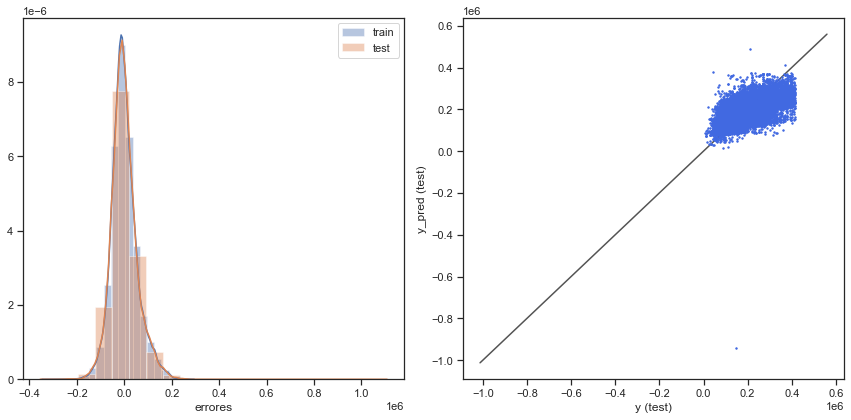

La metrica de error RMSE, en el set de test, empeoro en un -2.54 % respecto del modelo de la PARTE A


REGRESIÓN CON ATRIBUTOS POLINÓMICOS NUMERO 11
Agregamos atributos hasta la potencia x**11
Los atributos tienen forma: (63030, 77)
Pendientes: [[ 2.24353307e+05  4.84088083e+05 -7.27005968e+04 -4.59147928e+05
  -5.93016834e+05 -1.50680528e+05 -1.17179015e+06 -3.23799864e+06
  -3.02673914e+06  4.35593907e+04  5.23666154e+05  2.04548091e+06
   3.57961806e+06  2.31516424e+06  2.79732996e+04  3.59900047e+05
   1.94098956e+06  5.32691896e+06  7.47634056e+06  4.26201421e+06
  -1.07926825e+04 -1.79263569e+05 -1.17695820e+06 -4.19925094e+06
  -8.45648399e+06 -9.07583811e+06 -4.02517423e+06 -6.06647354e+02
  -9.63134768e+03 -8.33190088e+04 -3.93472212e+05 -1.13097984e+06
  -1.99426824e+06 -2.03091708e+06 -9.15041754e+05  7.83965086e+02
   1.66531448e+04  1.53590693e+05  8.22454429e+05  2.76933034e+06
   5.99443004e+06  8.13333724e+06  6.31139489e+06  2.13605518e+06
  -1.41150673e+02 -3.35046425

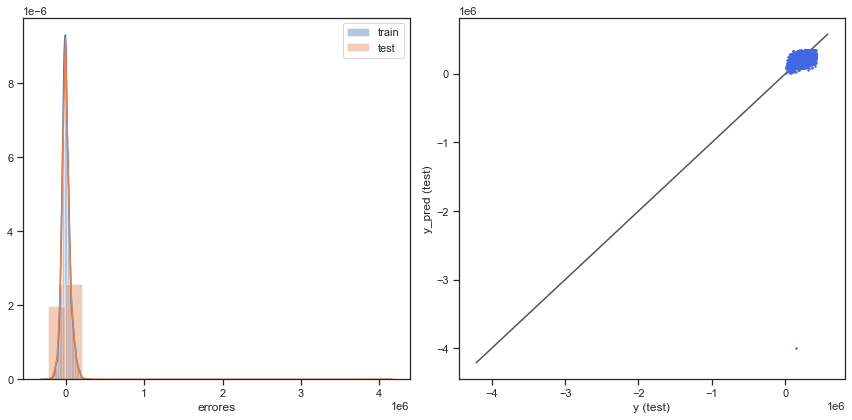

La metrica de error RMSE, en el set de test, empeoro en un -10.98 % respecto del modelo de la PARTE A




In [61]:
evaluar_distintos_polinomios (regresion_lineal_tasador_propiedades, degree, X_train, X_test, y_train, y_test, 
                              RMSE_PARTEA[1])

**Nota de aclaración:** El valor negativo (-) en el porcentaje indica un resultado que empeoro con respecto a la metrica RMSE con quien la comparo (Árbol entrenado en la PARTE A de este proyecto). Cuando el valor porcentual es (+) significa una mejora de la metrica respecto de su comparación.

Analizando los gráficos para cada grado de polinomio entrenado, veo que, a mi entender, que el mejor polinomio que aproxima con un modelo de regresión lineal es el de orden 5. Con este valor continuare el análisis y ejecutare sobre este modelo de orden 5, regularización. Luego veré si producen mejoras sobre la metrica de comparación que estoy utilizando o no. Una mejora seria la reducción del error RMSE con respecto a mi benchmark (Árbol entrenado en la PARTE A de este proyecto)

### Regresión lineal con Regularización

Utilizo el mejor grado que preformó en los modelos de regresión lineal recién evaluados y aplico regularización.

In [62]:
potencia_optima=5
poly = PolynomialFeatures(degree=potencia_optima, include_bias=False)
poly.fit(X_train)
X_train_orden_superior =poly.transform(X_train)
X_test_orden_superior = poly.transform(X_test)

### Regularizacion Ridge

In [63]:
regularizacion_ridge = Ridge()
regularizacion_ridge.fit(X_train_orden_superior,y_train)
print(f'Pendientes: {regularizacion_ridge.coef_}')
print(f'Ordenada: {regularizacion_ridge.intercept_}\n')

Pendientes: [[ 1.41160389e+04 -2.98107180e+04 -2.22121106e+03  6.07933987e+03
   2.78324181e+04  2.44893357e+03  2.07275594e+04  6.93108525e+04
   6.84352353e+04 -1.04211162e+02 -3.37450247e+03 -2.62411074e+04
  -6.08041018e+04 -5.23179089e+04 -2.00033194e+01  4.82579233e+01
   1.67167220e+03  6.90830200e+03  1.33857234e+04  9.22622869e+03]]
Ordenada: [163290.17071559]



Raíz del error cuadrático medio en Train: 55826.765343456136
Raíz del error cuadrático medio en Test: 56039.89423050279


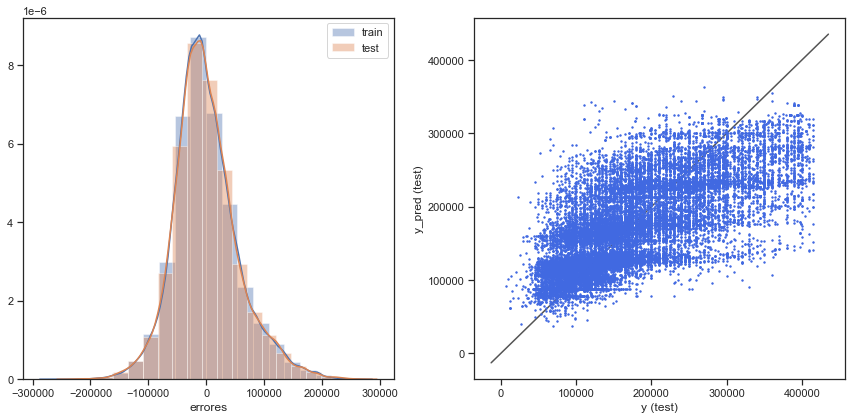

La metrica de error RMSE, en el set de test, empeoro en un -4.10 % respecto del modelo de la PARTE A




In [64]:
RMSE_RIDGE=evaluar_regresion(regularizacion_ridge, X_train_orden_superior, X_test_orden_superior, y_train, y_test)
porcentaje_de_mejora(RMSE_RIDGE[1],RMSE_PARTEA[1], False)
lista_metricas_y_modelos.append(RMSE_RIDGE)

In [65]:
X_train_orden_superior.shape

(63030, 20)

### Regularizacion Ridge con optimizacion de hiperparametros y CV

In [66]:
reg_ridge = Ridge()
#Lista de hiperparametros para regularizacion Ridge()
param_grid = {'alpha':[0.01,0.1,1,2],
              'max_iter':[100,1000]}

regularizacion_ridge_grid_search=GridSearchCV(reg_ridge, param_grid=param_grid, scoring='neg_mean_squared_error',n_jobs=3, cv=5)
regularizacion_ridge_grid_search.fit(X_train_orden_superior, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=3,
             param_grid={'alpha': [0.01, 0.1, 1, 2], 'max_iter': [100, 1000]},
             scoring='neg_mean_squared_error')

In [67]:
regularizacion_ridge_grid_search.best_params_

{'alpha': 0.1, 'max_iter': 100}

Raíz del error cuadrático medio en Train: 55826.73847782742
Raíz del error cuadrático medio en Test: 56038.949259170025


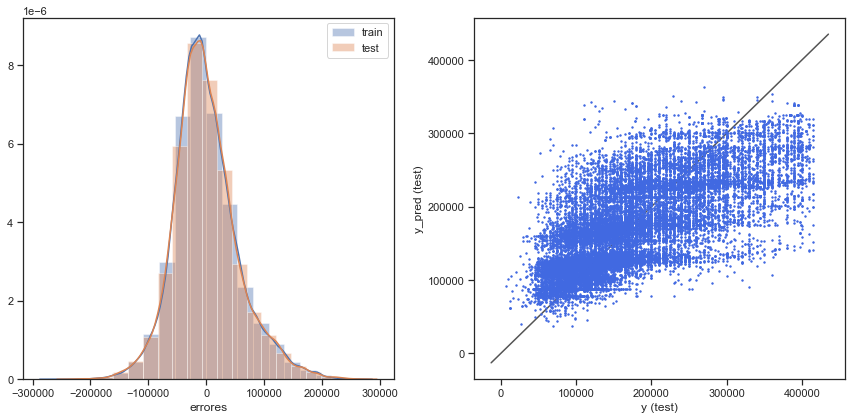

La metrica de error RMSE, en el set de test, empeoro en un -4.10 % respecto del modelo de la PARTE A




In [68]:
RMSE_RIDGE=evaluar_regresion(regularizacion_ridge_grid_search, X_train_orden_superior, X_test_orden_superior, y_train, y_test)
porcentaje_de_mejora(RMSE_RIDGE[1],RMSE_PARTEA[1], False)
lista_metricas_y_modelos.append(RMSE_RIDGE)

La regularización Ridge no trajo ninguna mejora. Por lo que concluyo que el método no penalizo ningún coeficiente de la regresión polinómica por no está en overfitting. Da igual resultados que sin la regularización. A continuación, verifico con Regularización Lasso.

### Regularizacion Lasso

In [69]:
regularizacion_lasso = Lasso()
regularizacion_lasso.fit(X_train_orden_superior,y_train)
print(f'Pendientes: {regularizacion_lasso.coef_}')
print(f'Ordenada: {regularizacion_lasso.intercept_}\n')

Pendientes: [ 3.04037285e+04  5.93427653e+03 -3.16364506e+02 -5.21529790e+02
  5.63261381e+03  7.14868924e+01  7.66929845e+02  1.33518501e+04
  1.93586690e+04 -9.40880695e+01 -1.30998600e+02 -3.85020444e+03
 -8.61235229e+03 -1.14298898e+04  5.92324309e+00  3.97747897e+01
  2.94589709e+02  4.45583914e+02  1.80871699e+03  1.63057323e+03]
Ordenada: [173152.20908773]



Raíz del error cuadrático medio en Train: 56102.5747371209
Raíz del error cuadrático medio en Test: 56392.67173231998


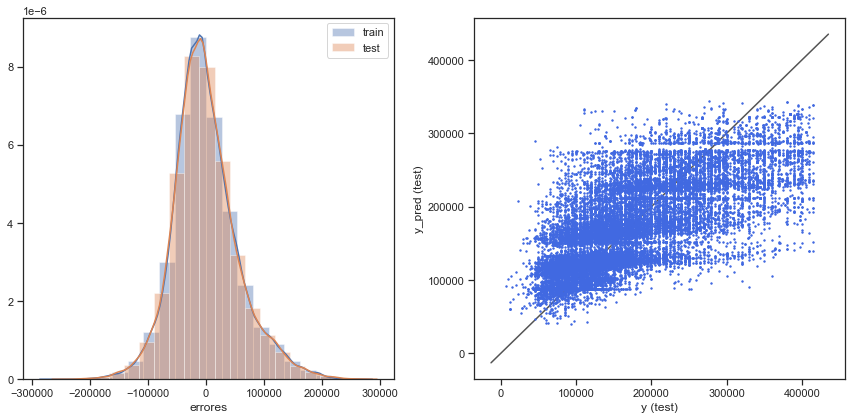

La metrica de error RMSE, en el set de test, empeoro en un -4.75 % respecto del modelo de la PARTE A




In [70]:
RMSE_LASSO=evaluar_regresion(regularizacion_lasso, X_train_orden_superior, X_test_orden_superior, y_train, y_test)
porcentaje_de_mejora(RMSE_LASSO[1],RMSE_PARTEA[1], False)
lista_metricas_y_modelos.append(RMSE_LASSO)

### Regularizacion Lasso con optimizacion de hiperparametros y CV

In [71]:
reg_lasso = Lasso()
#Grilla de hiperparametros regresion Lasso
param_grid = {'alpha':[0.0001,0.001,0.01,0.1,1,2],
              'max_iter':[1000,3000]}

regularizacion_lasso_grid_search=GridSearchCV(reg_lasso, param_grid=param_grid, scoring='neg_mean_squared_error',n_jobs=3, cv=5)

In [72]:
regularizacion_lasso_grid_search.fit(X_train_orden_superior, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=3,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 2],
                         'max_iter': [1000, 3000]},
             scoring='neg_mean_squared_error')

In [73]:
regularizacion_lasso_grid_search.best_params_

{'alpha': 0.0001, 'max_iter': 3000}

Raíz del error cuadrático medio en Train: 55974.8174693079
Raíz del error cuadrático medio en Test: 56243.32994128975


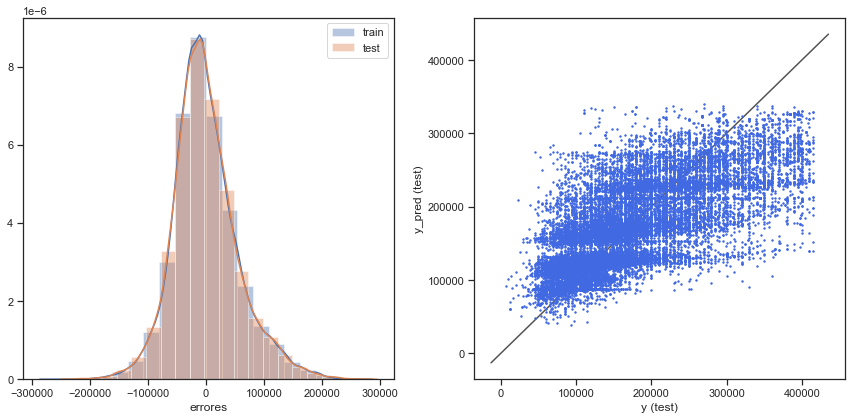

La metrica de error RMSE, en el set de test, empeoro en un -4.48 % respecto del modelo de la PARTE A




In [74]:
RMSE_LASSO=evaluar_regresion(regularizacion_lasso_grid_search, X_train_orden_superior, X_test_orden_superior, y_train, y_test)
porcentaje_de_mejora(RMSE_LASSO[1],RMSE_PARTEA[1], False)
lista_metricas_y_modelos.append(RMSE_LASSO)

Veo que la regularización no aporto mejora alguna en cuanto a la comparación entre estos modelos regularizados y el modelo de árbol entrenado en la PARTE A de este trabajo. Es evidente que un modelo de regresión lineal no es de los más convenientes para lo que deseo realizar en este proyecto que es predecir con el menor error posible el valor de una propiedad.

Por lo expresado continuare mi análisis de modelos avanzados planteando un Random Forest Regressor.

### Random Forest Regressor
Voy a utilizar un modelo avanzado de Random Forest para regresion. 

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_nuevo, y, test_size=0.3, random_state=42)

In [76]:
random_forest = RandomForestRegressor()
random_fores_cv = cross_validate(random_forest, X_train, np.ravel(y_train),scoring='neg_mean_squared_error', cv=5, return_estimator=True)

In [77]:
random_forest.fit(X_train, np.ravel(y_train, order='C'))

RandomForestRegressor()

Raíz del error cuadrático medio en Train: 16428.056611870223
Raíz del error cuadrático medio en Test: 38037.23920468341


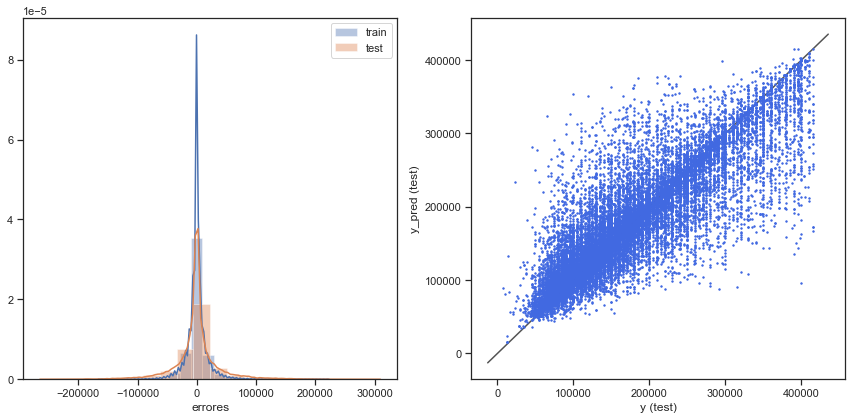

La metrica de error RMSE, en el set de test, mejoro un 29.34 % respecto del modelo de la PARTE A




In [78]:
RMSE_RANDOM_FOREST=evaluar_regresion(random_forest, X_train, X_test, y_train, y_test)
porcentaje_de_mejora(RMSE_RANDOM_FOREST[1],RMSE_PARTEA[1], False)
lista_metricas_y_modelos.append(RMSE_RANDOM_FOREST)

Este modelo tiene overfiting ya que evidentemente "aprendió muy bien los datos de Train" ya que tiene un error RMSE muy bajo, pero tiene alto error RMSE sobre el set de Test. La distribucion de su RMSE en test muestra una distribucion con mas desvio que en el set de Train. Es decir el modelo tiene alta varianza en la prediccion.

### Random Forest con optimizacion de hiperparametros con Random Search y CV

Realizo la busqueda de mejores hiperparametros para el modelo. Utilizo validacion cruzada. 

In [79]:
random_forest = RandomForestRegressor()

In [80]:
# Grilla para Random Search
param_dist = {'n_estimators':sp.stats.randint(100, 300),
              'max_depth': sp.stats.randint(2, 10),
              'max_features':['sqrt','auto'],
              'min_samples_split':sp.stats.randint(2, 8),
              'min_samples_leaf':sp.stats.randint(2, 6)}

In [81]:
random_forest_random_search = RandomizedSearchCV(random_forest, param_distributions=param_dist, 
                           scoring='neg_mean_squared_error',n_jobs=3, cv=5)

In [ ]:
random_forest_random_search.fit(X_train,np.ravel(y_train))

In [ ]:
print("Mejores parametros: "+str(random_forest_random_search.best_params_))

In [ ]:
RMSE_RANDOM_FOREST_OPTIIMIZADO=evaluar_regresion(random_forest_random_search, X_train, X_test, y_train, y_test)
porcentaje_de_mejora(RMSE_RANDOM_FOREST_OPTIIMIZADO[1],RMSE_PARTEA[1], False)
lista_metricas_y_modelos.append(RMSE_RANDOM_FOREST_OPTIIMIZADO)

### Evaluación de Random Forest con set de datos sin reducción de dimensionalidad, optimizacion de hiperparametros y CV

Ahora voy a analizar Random Forest pero aplicando el set de datos sin reducción de dimensionalidad. Esto producirá que el modelo pueda seleccionar features al azar haciendo que los árboles que conforman el bosque puedan descorrelacionarse unos de otros por ver distintas partes del dataset de entrenamiento. Esto hará que al final del entrenamiento los arboles no se parezcan entre si y causara que se elimine el sesgo de las predicciones.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
X_train_sin_pca, X_test_sin_pca, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
random_forest=RandomForestRegressor()

In [ ]:
# Grilla para Random Search
param_dist = {'n_estimators':sp.stats.randint(100, 300),
              'max_depth': sp.stats.randint(2, 10),
              'max_features':['sqrt'],
              'min_samples_split':sp.stats.randint(2, 10),
              'min_samples_leaf':sp.stats.randint(2, 8)}

In [ ]:
random_forest_optimizado_sin_datos_pca=RandomizedSearchCV(random_forest, param_distributions=param_dist,scoring='neg_mean_squared_error',n_jobs=3, cv=5)

In [ ]:
random_forest_optimizado_sin_datos_pca.fit(X_train_sin_pca,np.ravel(y_train))

In [ ]:
print("Mejores parametros: "+str(random_forest_optimizado_sin_datos_pca.best_params_))

In [ ]:
random_forest_optimizado_sin_datos_pca.best_estimator_.feature_importances_

In [ ]:
RMSE_RANDOM_FOREST_OPTIIMIZADO_SIN_PCA=evaluar_regresion(random_forest_optimizado_sin_datos_pca, X_train_sin_pca, X_test_sin_pca, y_train, y_test)
porcentaje_de_mejora(RMSE_RANDOM_FOREST_OPTIIMIZADO_SIN_PCA[1],RMSE_PARTEA[1], False)
lista_metricas_y_modelos.append(RMSE_RANDOM_FOREST_OPTIIMIZADO_SIN_PCA)

Noto que este ultimo modelo es el mejor de todos los predictores. Trae una mejora sustancial sobre su metrica RMSE, con respecto al modelo Benchmark (árbol entrenado en la PARTE A), superior al 20%. Seguido realizare el análisis y comparación para todos los modelos para definitivamente encontrar el mas performante para predecir los precios de las propiedades.

## Resumen y comparación
### Grafico de todos los modelos y sus métricas de RMSE para comparar

A continuación, realizare el código para generar graficas que puedan mostrar un resumen que sirva para comparar visualmente todos los modelos trabajados hasta aquí, a fin de evaluar el mejor de los modelos que reduzca el error en las predicciones y no tenga overfitting o underfitting.

In [ ]:
myarray = np.asarray(lista_metricas_y_modelos)
e_dataframe = pd.DataFrame(myarray) 
e_dataframe.columns=['rmse_train','rmse_test','modelo']
lista_de_modelos=['arbol_tasador_propiedades','regresion_lineal_tasador_propiedades','regresion_lineal_tasador_propiedades_grado2','regresion_lineal_tasador_propiedades_grado3',
                   'regresion_lineal_tasador_propiedades_grado4','regresion_lineal_tasador_propiedades_grado5','regresion_lineal_tasador_propiedades_grado6',
                   'regresion_lineal_tasador_propiedades_grado7','regresion_lineal_tasador_propiedades_grado8','regresion_lineal_tasador_propiedades_grado9',
                   'regresion_lineal_tasador_propiedades_grado10','regresion_lineal_tasador_propiedades_grado11','regularizacion_ridge',
                   'regularizacion_ridge_grid_search','regularizacion_lasso','regularizacion_lasso_grid_search',
                   'random_forest','random_forest_random_search','random_forest_optimizado_sin_datos_pca']
models=np.asarray(lista_de_modelos)
np.size(models)
e_dataframe['modelos_string']=models.reshape(-1,1)

In [ ]:
x=np.arange(1,20,1)
e_dataframe['Id_modelo']=x
#sns.set(style="whitegrid",palette='deep')
plt.figure(figsize = (15,16))
plt.subplots_adjust(hspace = 1.2)
plt.subplot(2,1,1)
plt.bar(e_dataframe['modelos_string'], e_dataframe['rmse_test'], width=0.65, label='RMSE TEST', color='darkorange')
plt.bar(e_dataframe['modelos_string'], e_dataframe['rmse_train'], width=0.4,align='edge', label='RMSE TRAIN',
        color='lightslategray')
plt.xlabel('Modelo ensayado', fontsize=16)
plt.ylabel('Valor metrica RMSE', fontsize=16)
plt.title('RMSE sobre set de train y test evaluados por modelo', fontsize=19)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.legend()
plt.subplot(2,1,2)
sns.lineplot(x ='modelos_string', y =e_dataframe['rmse_test'].astype(float),sizes='modelos_string',
                 sort=False, data = e_dataframe, marker="o", label="RMSE TEST",palette="tab10", linewidth=3.5,color='darkorange')
sns.lineplot(x='modelos_string', y =e_dataframe['rmse_train'].astype(float),sizes='modelos_string',
                 sort=False, data = e_dataframe, marker="o", label="RMSE TRAIN",palette="tab10", linewidth=3.5, color='lightslategray')
plt.legend(["TRAIN","TEST"])
plt.xlabel('Modelo ensayado', fontsize=16)
plt.ylabel('Valor metrica RMSE', fontsize=16)
plt.title('RMSE sobre set de train y test evaluados por modelo', fontsize=19)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.legend()
plt.show()

Estas dos graficas utilizan los mismos datos para realizar dos representaciones visuales de las métricas RMSE para cada modelo entrenado. Se puede observar que el modelo que mejor reduce la raíz del error cuadrático medio RMSE y que no presenta síntomas de overfitting es el modelo Random Forest Optimizado y entrenado con datos sin reducción de dimensionalidad.

## Conclusión
Al observar las gráficas, veo que el modelo que reduce la metrica RMSE y mejora las predicciones, tanto para los sets de datos Train y Test es Random_Forest_Optimizado_sin_datos_pca (Ramdom Forest con hiperparametros optimizados por Grid Search con validacion cruzada y con datos previos a aplicación de reduccion de dimensionalidad PCA). Esto se debe a que además de aplicar Bagging, Random Forest también selecciona features al azar, de esa manera descorrelaciona aún más los distintos modelos de árbol creados y por ende no se parecen entre ellos y mejora la predicción (se reduce el error RMSE).

Este modelo mejoro el error RMSE en la predicción un orden del 20 % respecto del modelo de la PARTE A (Árbol de decisión Regresor con hiperparametros optimizados por búsqueda manual realizada en el Proyecto N°1)

**SELECCION FINAL DEL MODELO** Ramdom Forest con hiperparametros optimizados por Random Search con validacion cruzada y con datos previos a la aplicación de reduccion de dimensionalidad PCA (model: random_forest_optimizado_sin_datos_pca).

## Parte C - Interpretación de modelos

### Consigna
De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

### Resolución

Para responde a la primer pregunta sobre, que variables fueron relevantes para el modelo para realizar la predicción, voy a usar el metodo feature_importances_. Este me dirá como el modelo utilizo los features por orden de importancia para realizar las predicciones. El total de los features aporta 1 como valor total de importancia a las predicciones, siendo una fracción de 1 el valor de cada uno de ellos aporta a la predicción.

Para evaluarlo en forma representativa realizare un gráfico de Importancia de Features para el modelo Random Forest Optimizado y entrenado con el set de datos sin reducción de dimensionalidad.

### Grafico de importancia de features para el mejor modelo seleccionado

In [ ]:
importances = random_forest_optimizado_sin_datos_pca.best_estimator_.feature_importances_
columns = X_train_sin_pca.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize = (12,5))
sns.barplot(columns[indices], importances[indices],palette='rainbow_r')
plt.xlabel('Features',fontsize=16)
plt.ylabel('Importancia para el modelo',fontsize=16)
plt.title('Importancia de features para el modelo de Random Forest optimizado',fontsize=18)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

En el grafico pueden verse las variables:
* Superficie cubierta
* Superficie total
* Baños
* Latitud
* Ambientes
* Dormitorios

Realizan un aporte por encima de 0,05 sobre 1 en importancia para el modelo. Siendo la variable más importante Superficie cubierta con una importancia de 0,24 sobre 1.

Las variables que no son tan importantes para el modelo con aportes inferiores a 0,05 son:
* capital federal
* departamento
* ph
* longitud
* zona_oeste
* casa
* zona_sur
* zona_norte 

El modelo de Random Forest utiliza un hiperparametro **max_features** donde uno puede indicarle al modelo el número de atributos a tener en cuenta al buscar la mejor división. Esto hará que los arboles entrenados por el modelo vean solo un set de features de los totales y se parezcan lo menos posible entre ellos al finalizar el entrenamiento. Por este motivo cada árbol será distinto a los demás por haber "visto" (sido entrenado) con features diferentes comparados con el resto.

En una parte coincide con lo esperado y lo que había analizado en el proyecto N°1 sobre este dataset. Que sean buenas variables predictoras del precio de una propiedad, el tamaño de la misma, la cantidad de baños o ambientes, la cantidad de habitaciones que posee la propiedad, por nombrar algunas. 

Por otra parte, no todo coincide con lo esperado, ya que hay 2 variables que son de importancia para la predicción del modelo y que a priori no se me hubiesen ocurrido, como lo son la Latitud y Longitud (esta ultima en menor medida). Aunque pensando bien luego de realizado todo este análisis, parece muy lógico esperar que la ubicación geográfica de la propiedad determine, o este correlacionada, con el precio de la misma y sea una buena variable predictora (barrios o micro zonas más caras que otras).

### Elijo varios árboles dentro de Random Forest y los analizo.

A continuación, observo 5 árboles dentro de Random Forest y graficare como va ejecutándose la división en nodos y hojas para cada uno. 

Estos árboles se diferencian en que ven distintos features del set de datos inicial y esto hace que cada árbol se descorrelacione del resto. Por lo tanto, cada uno puede diferenciarse de los demás y será mejor el resultado de la predicción promediada del conjunto de árboles.

In [ ]:
feature_names=['lat', 'lon','rooms', 'bedrooms','bathrooms','surface_total','surface_covered','casa',
               'departamento','ph', 'zona_norte', 'zona_oeste', 'zona_sur', 'capital_federal']

In [ ]:
maximo_de_profundidad_a_graficar=2
arbol_numero=np.random.randint(1,random_forest_optimizado_sin_datos_pca.best_params_['n_estimators'],5)

Ahora grafico algunos arboles contenidos dentro del modelo Random Forest

In [ ]:
from sklearn import tree
g=0
for i in arbol_numero:
    g=g+1
    fig, ax = plt.subplots(figsize=(12, 30))
    plt.subplot(arbol_numero.size,1,g)
    plt.subplots_adjust(hspace=.005)
    tree.plot_tree(random_forest_optimizado_sin_datos_pca.best_estimator_[i], feature_names=feature_names,
                   class_names=True,rotate=False, filled = True, max_depth=maximo_de_profundidad_a_graficar, 
                   proportion=True, rounded=True, precision=1, label='all',fontsize=14,)
    plt.title(f'Representacion grafica del arbol regresor N° {i}. Solo se representa hasta profundidad {maximo_de_profundidad_a_graficar} del arbol', fontsize=18)
    plt.show()

Luego de ver el esquema de los arboles seleccionados al azar y al analizarlos, veo que cada uno de ellos ve distintos features como importantes para comenzar las preguntas del árbol y su division en nodos y hojas. Esto se debe a que, como explique, cada árbol ve una porción de features aleatorios distintos a los que ven los demás árboles.

### Distribución de errores (regresión) 

In [ ]:
RMSE_RANDOM_FOREST_OPTIIMIZADO_SIN_PCA=evaluar_regresion(random_forest_optimizado_sin_datos_pca, X_train_sin_pca, X_test_sin_pca, y_train, y_test)

Para comenzar un analisis de errires es importante saber que la técnica utilizada "Bagging" reduce el error de varianza y ayuda a evitar el sobreajuste del modelo. Esto es bueno pero tambien es parte de la falla, ya que **reduce**, pero **no elimina** completamente el error por varianza. En la distribución del error RMSE (grafico 1) puede verse que hay varianza (colas de la distribución). 

Continuando con el análisis, también veo en el mismo histograma de error (grafico 1) se observa que las distribuciones de errores en los sets de train y test son casi coincidentes, es decir en ambos sets el modelo predice con errores similares. Esto me asegura que Ramdom Forest con hiperparametros optimizados por Random Search, validación cruzada y con datos previos a la aplicación de reducción de dimensionalidad PCA, no está teniendo síntomas de overfitting.

Ahora, para ver sobre que porción de datos el modelo comete mayores errores al predecir, analizare como se distribuye este error en función del precio real de las unidades sobre el set de datos de test (es el set que me interesa analizar los errores ya que este set es una porción de datos nuevos para el modelo y de los cuales tengo el valor real de la variable que intento predecir 'precio').

Para comenzar armo un set de datos con los valores de precios reales de test y el error, en valor absoluto, entre el precio real y el precio predicho por el modelo seleccionado 'Random Forest con datos sin reducción de dimensionalidad'

In [ ]:
precio_y_errores=y_test.copy()
prediccion_precio=random_forest_optimizado_sin_datos_pca.predict(X_test_sin_pca)
precio_y_errores['error']=abs(y_test-prediccion_precio.reshape(-1,1))
precio_y_errores.head(3)

In [ ]:
precio_y_errores.shape

Seguido grafico la distribución de los errores (los que comete el modelo en su predicción) versus los valores reales de precios. De esta forma, podre observar sobre que porción de precios el error en las predicciones se incrementa, o sea donde más falla el modelo al predecir.

In [ ]:
plt.figure(figsize = (12,6))
ax=plt.scatter(precio_y_errores.price,precio_y_errores.error, s=32, c=precio_y_errores.error,cmap= 'jet',marker='o')
plt.colorbar(ax, orientation='vertical',aspect=25)
plt.xlabel('Precio real (y_test)',fontsize=16)
plt.ylabel('Valor absoluto del error en la prediccion',fontsize=16)
plt.title('Distribucion del error en funcion del precio',fontsize=18)
plt.show()

En esta grafica observo que para valores de precios superiores a USD 300.000 el modelo comienza a incrementar el error que comete en su predicción. Tratare de ver en la distribución de datos de entrenamiento, qué cantidad de datos recibió el modelo para este rango de precios, comparado con el rango de precios inferiores a USD 300.000.

In [ ]:
plt.figure(figsize = (10,5))
sns.distplot(y_train.price, bins=20,label='Distribucion de la variable precio en test', color='red')
plt.legend()
plt.xlabel('Precio real de entrenamiento (y_train)',fontsize=16)
plt.ylabel('Numero de observaciones',fontsize=16)
plt.title('Distribucion del precio en el set de entrenamiento',fontsize=18)
plt.show()

Analizando la distribución de la variable y_train (que son las etiquetas precio con las que entrene mi modelo) observo que la cantidad de muestras disponibles para valores mayores a USD 300.000 es muy inferior comparada con precios inferiores y representan aproximadamente 1/5 de la cantidad de muestras disponibles para valores de propiedades entre 80.000 y 150.000. Esto me dice que mi modelo no recibió tantos datos de propiedades, dentro del rango USD 300.000 a USD 400.000 para entrenarse y, por consiguiente, incrementa su error en predicciones sobre ese rango de precios comparado con las predicciones para rangos inferiores a USD 300.000.

## Crítica a la metodología utilizada

* Al realizar el pre procesamiento de datos deberíamos poder tener un hilo conductor en la metodología que permita en secuencia ir ejecutando pasos a fin de lograr la mejor ingeniería de features para no olvidar o ejecutar un paso que pueda comprometer los siguientes. En este sentido me surgió la duda si primero tenía que realizar imputaciones de valores faltantes o identificación y filtrado de valores outliers. Al analizar con mucho detenimiento entendí, a mi parecer y según lo que expliqué en ese apartado, que si imputaba valores faltantes podía contaminar instancias del dataset con agregado de datos que podrían estar desviados del ideal porque contenían valores extremos atípicos (outliers) que podrían distorsionar las distribuciones de cada feature y por lo tanto, los valores estadísticos con los que hubiese imputado.
 ***Seria de mucha utilidad contar con alguna herramienta que permita hacer el trabajo de ingeniería de features en forma secuencial y ordenada para la práctica.***

* Por otro lado, me sucedió que al analizar la metrica RMSE entre los modelos, que fui desarrollado durante el proyecto, me encontré con la pregunta: ¿Cuánto es el valor de una metrica RMSE que sea aceptable para decir que es buena aproximación? Solo pude comprarlas entre modelos y concluí que, la mejor era aquella cual menor valor tenia con respecto al resto de los modelos y observando tambien que los valores RMSE train vs RMSE test estuvieran en ordenes similares para concluir que no estuviera haciendo OverFitting. De todos modos no encontré un valor, por ejemplo un porcentaje, de cuanto es aceptable un desvío en la predicción (metrica RMSE) con respecto a los valores reales. Tambien por otro lado infiero y entiendo que esto esta muy atado al problema en particular en el cual estemos trabajando.

## Desafio opcional

### Consigna
Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

### Resolución

Para resolver este desafío realizo clusterizacion con DBSCAN a fin de encontrar el número de cluster que detecta a partir de definir los hiperparametros epsilon y el valor de min_samples.
Luego realizare una reducción de dimensionalidad a 2 dimensiones y observare con las etiquetas obtenidas en DBSCAN para visualizar el comportamiento.

In [ ]:
from sklearn.cluster import DBSCAN

# Defino epsilon y el valor de min_samples. Estos son los parametros del método.
db_1 = DBSCAN(eps=0.8, min_samples=8)

In [ ]:
db_1.fit_predict(X)

In [ ]:
# Veo las etiquetas
labels_1 = db_1.labels_

# Calculo el numero de clusters ignorando los valores aislados
n_clusters_1 = len(set(labels_1)) - (1 if -1 in labels_1 else 0)
n_noise_1 = list(labels_1).count(-1)

In [ ]:
print('Estimated number of clusters: %d' % n_clusters_1)
print('Estimated number of noise points: %d' % n_noise_1)

In [ ]:
pca = PCA(n_components=2)
X1 = pca.fit_transform(X) 

In [ ]:
# Funcion para plotear, NO CAMBIAR NADA
def plot_DBSCAN(X1,labels_1,db_1,n_clusters_1):
    # Armamos una mascara, con unos en los datos que son CORES.
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    core_samples_mask_1[db_1.core_sample_indices_] = True
    # Plot result
    plt.figure(figsize = (12,12))
    # Black removed and is used for noise instead.
    unique_labels = set(labels_1)
    colors = [plt.cm.prism(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels_1 == k)

        xy = X1[class_member_mask & core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X1[class_member_mask & ~core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], '*', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=4)
    plt.title('Numero estimado de clusters: %d' % n_clusters_1, fontsize=18)
    plt.show()
    return

In [ ]:
plot_DBSCAN(X1,labels_1,db_1,n_clusters_1)

Observo que detecta 197 clusters y esto puede estar relacionados con los barrios en combinacion con el tipo de propiedad por cada uno de ellos los cuales forman densidades de agrupaciones espaciales de datos que DBSCAN detecta e identifica.